In [ ]:
#Christine Orosco
#Texas demographic and health statistics EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from scipy.stats import shapiro, normaltest, ttest_ind, ttest_rel


In [2]:

def Compute_Cohend(mean1, mean2,ser1,ser2, var1, title): 
    """Compute cohens'd to see the effect size"""     
    
    diff = mean1 - mean2
    n1, n2, = len(ser1), len(ser2)
    
    pooled_var = (n1 * var1 + n2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    print(f'{title} = {d}  \n')
    return d


def Hist_Plot(subtitle, xlab1, xlab2, ser1, ser2):
    """Plot histogram using matplotlin ploty plots two small plots
        side by side for comparison"""
     
    # Main Title    
    fig = plt.figure(figsize=(10,10))
    title = fig.suptitle(subtitle, fontsize=14, fontweight="bold")
                         
    fig.subplots_adjust(top=0.88, wspace=0.3)
    
    # Histogram 1
    ax1 = ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlabel(xlab1)
    ax1.set_ylabel("Frequency")
    
    freq1, bins1, patches1 = ax1.hist(ser1, bins=10, color='darksalmon',  edgecolor='darkred', linewidth=1)
        
                                
    # Histogram 2
    ax2 = ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel(xlab2)
    ax2.set_ylabel("Frequency")
    
    freq2, bins2, patches2 = ax2.hist(ser2, bins=10, color='green', edgecolor='darkblue', linewidth=1) 
                          
                        
    return





def Sns_Kde(subtitle, xlab1, xlab2, ser1, mean1, ser2, mean2):
    """Plot KDE using seaborn- plot side by side for 
        comparison"""
     
    # Main Title    
    fig = plt.figure(figsize=(10,10))
    title = fig.suptitle(subtitle, \
                     fontsize=14, fontweight="bold")
    fig.subplots_adjust(top=0.88, wspace=0.3)
    
     # KDE 1
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlabel(xlab1)
    ax1.set_ylabel("Density")
    sns.kdeplot(ser1, shade=True,  color='darksalmon' )
    plt.axvline(x=mean1, color="black", linestyle="--")
    
    # KDE 2
    ax2 = ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel(xlab2)
    ax2.set_ylabel("Density")
    sns.kdeplot(ser2, shade=True,  color = 'green')
    plt.axvline(x=mean2, color="black", linestyle="--")
    return


def Cdf_Plot(subtitle, data):
    """Plot the CDF plots"""
    
    fig = plt.figure(figsize=(10,10))
    title = fig.suptitle(subtitle,\
                         fontsize=14, fontweight="bold")
    kwargs1 = {'cumulative': True}
    kwargs = {'cumulative': True, 'density': True}
    sns.distplot(data, hist_kws=kwargs, kde_kws=kwargs1)
    return


def Pmf_plot(subtitle, data, xlab):
    """Plot a PMF"""

    fig = plt.figure(figsize=(10,10))
    title = fig.suptitle(subtitle, \
                     fontsize=14, fontweight="bold")
    
    fig.subplots_adjust(top=0.88, wspace=0.3)
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel(xlab)
    probs=data.value_counts(normalize=True)
    sns.barplot(probs.index, probs.values)
    return


def Heatmap_Plot(subtitle, xlab1, xlab2, data1, data2):
    """Plot a heatmap or Correlation Map"""
    fig = plt.figure(figsize=(13,13))
    title = fig.suptitle(subtitle, \
                         fontsize=14, fontweight="bold")
    fig.subplots_adjust(top=0.88, wspace=0.3)
    # Heatmap1
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlabel(xlab1)
    sns.heatmap(
            data1,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=220),
            square=True)
    
    ax1.set_xticklabels(
        ax1.get_xticklabels(),
        rotation=45,
        horizontalalignment='right')
    
    #Heatmap2
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel(xlab2)
    sns.heatmap(
            data2,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=220),
            square=True)
    
    ax2.set_xticklabels(
        ax2.get_xticklabels(),
        rotation=45,
        horizontalalignment='right')
    return


def sns_Scatter(subtitle, xlab, ylab, x_val, y_val, data):
    "Scatter plots for variables"
    fig = plt.figure(figsize=(10,10))
    title = fig.suptitle(subtitle, \
                         fontsize=14, fontweight="bold")
    fig.subplots_adjust(top=0.88, wspace=0.3)
    # Scatter Plots
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel(xlab)
    ax1.set_xlabel(ylab)
    sns.scatterplot(x = x_val, y = y_val, data=data)
    return


def sns_Lmplot(subtitle, x_val, y_val, data):
    """Plot a rgeression line with the obs"""
    fig = plt.figure(figsize=(10,10))
    title = fig.suptitle(subtitle, \
                         fontsize=14, fontweight="bold")    
    fig.subplots_adjust(top=0.88, wspace=0.3)
   
    # Scatter Plots
    ax1 = fig.add_subplot(1,4,1)
    sns.lmplot(x=x_val, y=y_val, data=data)
  
    return    


In [3]:
# Set context to `"paper"`
sns.set(rc={"font.size":15,"axes.labelsize":10})
#fig, ax = plt.subplots(figsize=(10,10))
sns.set(color_codes=True)

In [4]:
# =============================================================================
# Using pg. 29 of your text as an example, compare two scenarios in your data using a
# PMF. Reminder, this isn’t comparing two variables against each other
#  – it is the same variable, but a different scenario. Almost like a filter.
#  The example in the book is first babies compared to all other babies, it
#  is still the same variable, but breaking the data out based on criteria 
#  we are exploring (Chapter 3).
# =============================================================================

## Read in Dataset

In [5]:
# =============================================================================
# Read csv file and drop first row which has texas cumulative dats
# =============================================================================
tx_data = pd.read_csv("~/tx_household.csv", sep = ",")
tx = pd.DataFrame(tx_data)
tx = tx.drop(tx.index[0])


# Create subsets

# RURAL
rural = tx[tx['Population'] <= 50000]  # rural communiy

# URBAN
urban = tx[tx['Population'] > 50000]

# rename variables for ease 
# Rural

s_percent = rural.percent_single
grad = rural.Grad_Rate
maths = rural.Math
read = rural.Read

# Urban

s_percent1 = urban.percent_single
grad1 = urban.Grad_Rate
maths1 = urban.Math
read1 = urban.Read


In [6]:
rural.describe()

,nbr_sing_household,nbr_household,percent_single,Rural,Population,Math,Read,Grad_Rate,poor_health,poor_sleep,Cost_Burden,Uninsured_health,Physicians,food_Insecure,Life_Expectancy
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,1122.634409,3468.086022,31.521505,7986.478495,14770.026882,2.941398,2.785484,94.392473,3064.365591,4692.655914,496.537634,2444.564516,5.317204,2178.870968,77.393548
std,1049.116656,3022.640709,10.032492,7027.797094,12605.944718,0.279684,0.237678,5.939492,2673.077929,4040.692191,505.374179,2083.528517,6.139057,2018.025879,2.376930
min,0.000000,61.000000,1.000000,82.000000,152.000000,2.100000,2.000000,62.000000,23.000000,50.000000,0.000000,27.000000,0.000000,10.000000,71.900000
25%,321.000000,1044.000000,25.250000,2954.000000,4470.000000,2.700000,2.700000,93.000000,857.250000,1418.500000,120.000000,812.750000,1.000000,572.500000,75.800000
50%,768.000000,2715.000000,32.000000,4983.500000,10989.000000,2.900000,2.800000,96.000000,2335.500000,3414.500000,336.000000,1827.500000,3.000000,1490.000000,77.300000
75%,1685.000000,5078.250000,37.000000,11931.250000,21421.000000,3.100000,2.900000,98.000000,4372.750000,6814.750000,656.750000,3549.000000,8.000000,3105.000000,78.975000
max,4875.000000,14001.000000,65.000000,31172.000000,49728.000000,4.000000,3.400000,100.000000,14489.000000,16987.000000,2451.000000,9222.000000,38.000000,9970.000000,89.700000


In [7]:
urban.describe()


,nbr_sing_household,nbr_household,percent_single,Rural,Population,Math,Read,Grad_Rate,poor_health,poor_sleep,Cost_Burden,Uninsured_health,Physicians,food_Insecure,Life_Expectancy
count,68.000000,6.800000e+01,68.000000,68.000000,6.800000e+01,68.000000,68.000000,68.000000,68.000000,6.800000e+01,68.000000,68.000000,68.000000,68.000000,68.000000
mean,31809.117647,9.693757e+04,31.264706,34735.838235,3.816856e+05,3.085294,2.894118,91.926471,74733.455882,1.260119e+05,16881.529412,62499.058824,239.191176,54094.852941,78.020588
std,68062.434466,1.882317e+05,6.571348,18480.051069,7.236031e+05,0.197948,0.176941,4.341113,141018.568160,2.434585e+05,36246.466308,135041.924584,462.947283,110360.809809,2.294286
min,2392.000000,9.762000e+03,17.000000,5022.000000,5.003100e+04,2.600000,2.500000,75.000000,8414.000000,1.508600e+04,1182.000000,6687.000000,6.000000,4210.000000,73.300000
25%,5136.750000,1.750350e+04,26.750000,19776.500000,6.795200e+04,3.000000,2.800000,90.000000,14305.500000,2.276400e+04,2361.000000,11253.500000,23.750000,10707.500000,76.200000
50%,9656.500000,3.161000e+04,32.000000,32598.000000,1.330275e+05,3.100000,2.900000,93.000000,23471.000000,4.166000e+04,4829.500000,18019.500000,74.000000,17410.000000,78.300000
75%,25979.750000,8.180650e+04,37.000000,47476.750000,3.150315e+05,3.200000,3.000000,95.000000,68266.000000,1.077918e+05,14472.000000,41986.500000,232.500000,47455.000000,79.425000
max,445154.000000,1.231476e+06,44.000000,103571.000000,4.698619e+06,3.600000,3.400000,97.000000,885812.000000,1.593969e+06,240521.000000,908742.000000,2742.000000,739120.000000,83.000000


### Is there a significant statistical difference between rural single parent 
### households and urban single parent households?

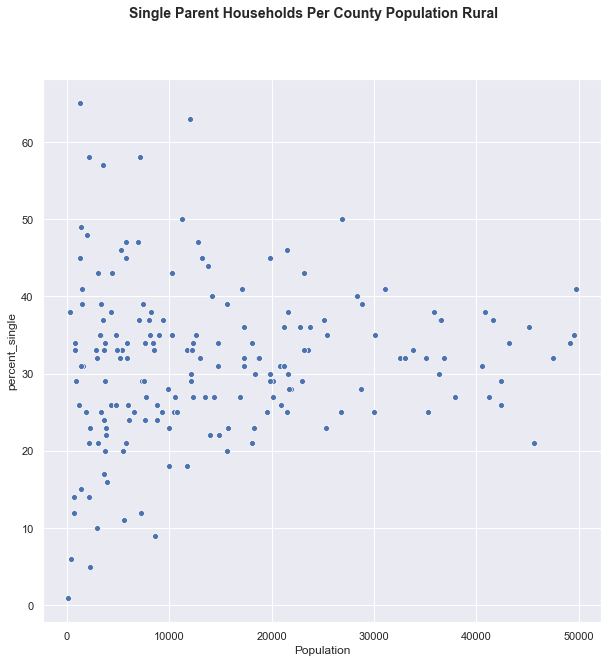

In [8]:
# =============================================================================
# 1. Is there a significant statistical difference between rural single parent 
#   households and urban single parent households?
#   look for counties that are considered rural 0 - 50K
#   or nbr of households > 50k
#    % single is based upon # hseholds
#   Look at the normal distribution for the precent single
#   In texas rural population is > than urban plus urban areas also
#   rural populations. Did not count these as I couldn't tell from 
#   the numbers if the rural was counted seperately from the urban.
# =============================================================================

# =============================================================================
# Create two scatter plots comparing two variables and provide your analysis
#  on correlation and causation. Remember, covariance, Pearson’s correlation, 
#  and Non- Linear Relationships should also be considered during your analysis
#  (Chapter 7).
# =============================================================================
subtitle = 'Single Parent Households Per County Population Rural'
x_val = 'Population'
y_val = 'percent_single'
xlab = 'Population'
ylab = 'Single Parent Household'
data = rural
sns_Scatter(subtitle, xlab, ylab, x_val, y_val, data)


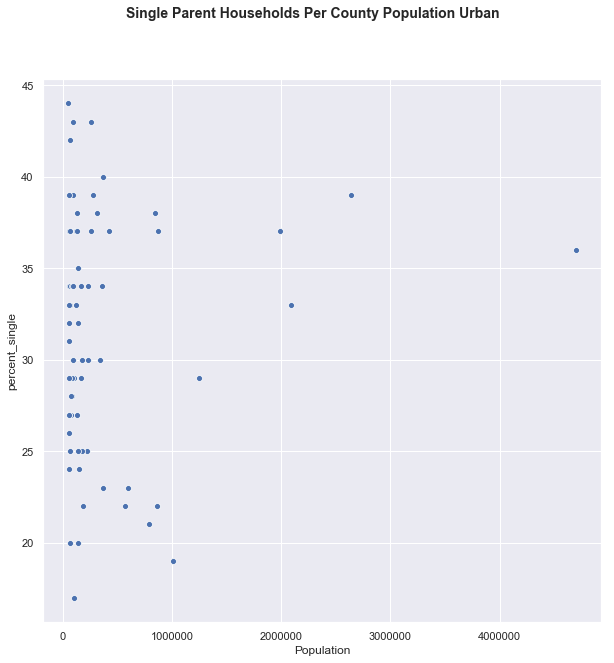

In [9]:
subtitle = 'Single Parent Households Per County Population Urban'
x_val = 'Population'
y_val = 'percent_single'
xlab = 'Population'
ylab = 'Single Parent Household'
data = urban
sns_Scatter(subtitle, xlab, ylab, x_val, y_val, data)

In [10]:
# =============================================================================
# Include the other descriptive characteristics about the variables: Mean,
#  Mode, Spread, and Tails (Chapter 2)
# =============================================================================
# Compute Mean, Variance and Std.

rs_mean = s_percent.mean()
rs_var = s_percent.var()
rs_std = s_percent.std()
rs_mode = s_percent.mode()
print(f'Rural:  Mean = {rs_mean}  Var = {rs_var}  Std = {rs_std}  Mode = {rs_mode} \n')
    
us_mean = s_percent1.mean()
us_var = s_percent1.var()
us_std = s_percent1.std()
us_mode = s_percent1.mode()
print(f'Urban:  Mean = {us_mean}  Var = {us_var}  Std = {us_std} Mode = {us_mode} \n')

# Set values for plotting PDF and Cohen's d
mean1 = rs_mean
mean2 = us_mean
var1 = rs_var
ser1 = s_percent 
ser2 = s_percent1 

# =============================================================================
#  Cohen's d
# 
#  What is the difference between single households in rural and urban 
#  couldn't derive the precentage of singles on rural area within urban counties.
# =============================================================================
ser1 = s_percent
ser2 = s_percent1
title = 'Cohens d for Single Parent Households Rural vs Urban'
cohen_d = Compute_Cohend(mean1, mean2, ser1, ser2, var1, title)


Rural:  Mean = 31.521505376344088  Var = 100.65088637024125  Std = 10.032491533524524  Mode = 0    32
dtype: int64 

Urban:  Mean = 31.264705882352942  Var = 43.18261633011412  Std = 6.571348136426354 Mode = 0    37
dtype: int64 

Cohens d for Single Parent Households Rural vs Urban = 0.029857843619705685  



In [11]:
# =============================================================================
# Include a histogram of each of the 5 variables – in your summary and 
# analysis, identify any outliers and explain the reasoning for them being
# outliers and how you believe they should be handled (Chapter 2).   
# =============================================================================

# =============================================================================
# Plot 1 analytical distribution and provide your analysis on how it applies
#  to the dataset you have chosen (Chapter 5).
# =============================================================================


## Histograms and PDFs

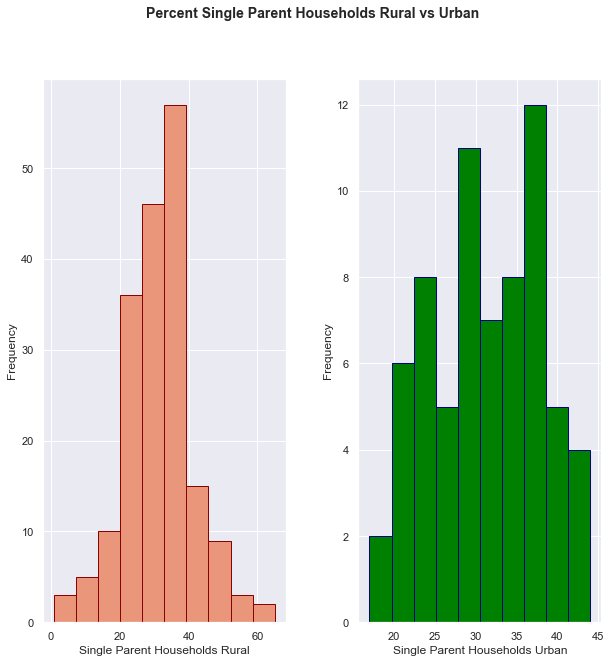

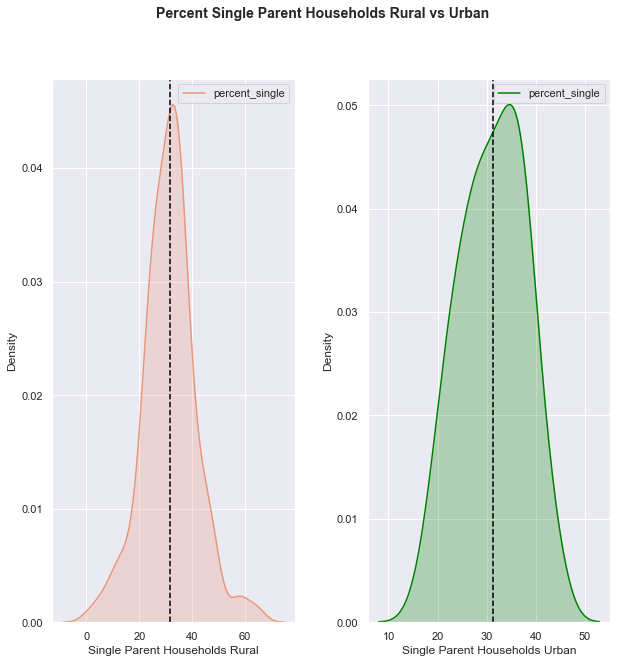

In [12]:
# Histogram and PDFs Single parent households rural vs urban
# =============================================================================
# plot side by side for comparison
subtitle = "Percent Single Parent Households Rural vs Urban"
xlab1 = "Single Parent Households Rural"
xlab2 = "Single Parent Households Urban"
binz = 10
 
Hist_Plot(subtitle, xlab1, xlab2, ser1, ser2)

# KDE/PDFs
Sns_Kde(subtitle,xlab1, xlab2, ser1, mean1, ser2, mean2)

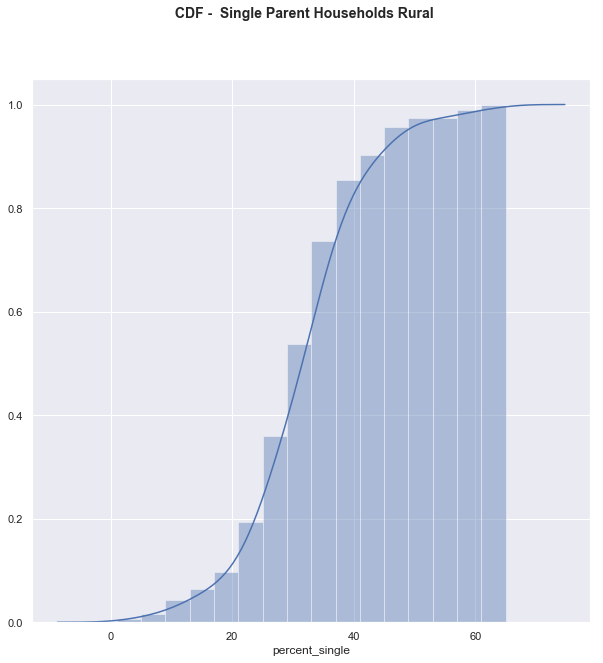

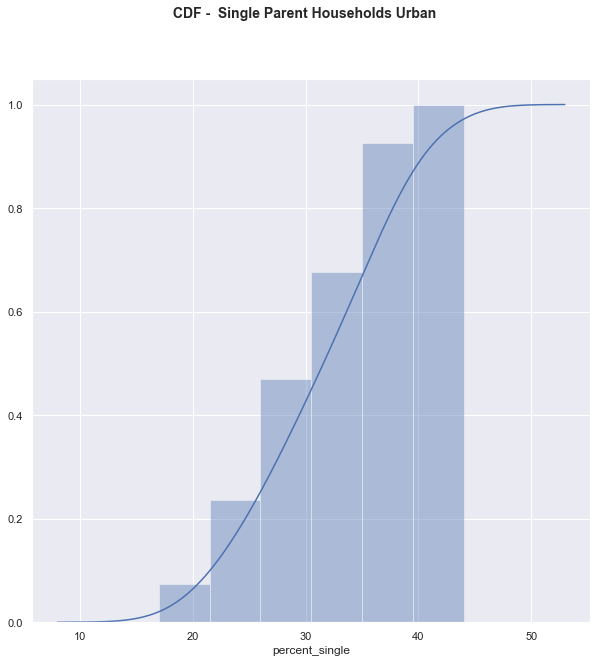

In [13]:
# =============================================================================
# Create 1 CDF with one of your variables, using page 41-44 as your guide, 
# what does 
# this tell you about your variable and how does
#  it address the question you are trying to answer (Chapter 4).
# =============================================================================

subtitle = " CDF -  Single Parent Households Rural"
Cdf_Plot(subtitle,ser1)
subtitle = " CDF -  Single Parent Households Urban"
Cdf_Plot(subtitle, ser2)


## Is the high school grduation rate and average math/reading scores 
## better in urban schools than rural schools?

In [14]:
# =============================================================================
#  2.Is the high school grduation rate and average math/reading scores 
#    better in urban schools than rural schools?
#     
#  There is a myth that the best schools are in suburban areas and urban and
#  rural schools are lacking in quality education.  Do the high school 
#  graduation rates and 3rd grade reading/math scores reflect this?
# =============================================================================

In [15]:
# =============================================================================
# # Compute Stats
# =============================================================================

# Graduation Rate
rg_mean = grad.mean()
rg_var = grad.var()
rg_std = grad.std()
rg_mode = grad.mode()
print(f'Rural - Grad_Rate:  Mean = {rg_mean}  Var = {rg_var}  Std = {rg_std}  Mode = {rg_mode} \n')

ug_mean = grad1.mean()
ug_var = grad1.var()
ug_std = grad1.std()
ug_mode = grad.mode()
print(f'Urban - Grad_Rate:  Mean = {ug_mean}  Var = {ug_var}  Std = {ug_std} Mode = {ug_mode} \n')

# Cohen's d
mean1 = rg_mean
mean2 = ug_mean
var1 = rg_var
ser1 = grad
ser2 = grad1
title = 'Cohens d for High School Graduation Rates Rural vs Urban'
Compute_Cohend(mean1, mean2,ser1,ser2, var1, title)

# 3rd Grade Average Reading Scores
rr_mean = read.mean()
rr_var = read.var()
rr_std = read.std()
rr_mode = read.mode()      
print('Rural - 3rd Grade Average Reading Scores')
print(f'Mean = {rr_mean}  Var = {rr_var}  Std = {rr_std} Mode = {rr_mode}\n')

ur_mean = read1.mean()
ur_var = read1.var()
ur_std = read1.std()
ur_mode = read1.mode()
print('Urban - 3rd Grade Average Reading Scores')
print(f'Mean = {ur_mean}  Var = {ur_var}  Std = {ur_std} Mode = {ur_mode} \n')

# Cohen's d
mean1 = rr_mean
mean2 = ur_mean
var1 = rr_var
ser1 = read
ser2 = read1
title = 'Cohens d for 3rd Grade Reading Levels Rural vs Urban'
Compute_Cohend(mean1, mean2,ser1,ser2, var1, title)

# 3rd Grade Average Math Scores
rm_mean = maths.mean()
rm_var = maths.var()
rm_std = maths.std()
rm_mode = maths.mode()
print('Rural - 3rd Grade Average Math Scores')
print(f'Mean = {rm_mean}  Var = {rm_var}  Std = {rm_std} Mode = {rm_mode} \n')

um_mean = maths1.mean()
um_var = maths1.var()
um_std = maths1.std()
um_mode = maths1.mode()
print('Urban - 3rd Grade Average Math Scores')
print(f'Mean = {um_mean}  Var = {um_var}  Std = {um_std} Mode = {um_mode}\n')

# Cohen's d
mean1 = rm_mean
mean2 = um_mean
var1 = rm_var
ser1 = maths
ser2 = maths1
title = 'Cohens d for 3rd Grade Math Levels Rural vs Urban'
Compute_Cohend(mean1, mean2,ser1,ser2, var1, title)

Rural - Grad_Rate:  Mean = 94.39247311827957  Var = 35.27756466143565  Std = 5.939491953141754  Mode = 0    98
dtype: int64 

Urban - Grad_Rate:  Mean = 91.92647058823529  Var = 18.845258999122024  Std = 4.341112645292912 Mode = 0    98
dtype: int64 

Cohens d for High School Graduation Rates Rural vs Urban = 0.4826872508130733  

Rural - 3rd Grade Average Reading Scores
Mean = 2.7854838709677425  Var = 0.056490845684394046  Std = 0.23767802945243813 Mode = 0    2.7
dtype: float64

Urban - 3rd Grade Average Reading Scores
Mean = 2.894117647058824  Var = 0.031308165057067586  Std = 0.17694113444043358 Mode = 0    2.9
dtype: float64 

Cohens d for 3rd Grade Reading Levels Rural vs Urban = -0.19540097249671604  

Rural - 3rd Grade Average Math Scores
Mean = 2.9413978494623647  Var = 0.07822290031967445  Std = 0.2796835717729492 Mode = 0    3.0
dtype: float64 

Urban - 3rd Grade Average Math Scores
Mean = 3.0852941176470585  Var = 0.03918349429323968  Std = 0.19794821113927674 Mode = 0    

-0.2524115783211429

In [16]:
# Descriptive Statistics

hs_df_rural = rural[['Grad_Rate', 'Math', 'Read']]
hs_df_rural.describe()


,Grad_Rate,Math,Read
count,186.000000,186.000000,186.000000
mean,94.392473,2.941398,2.785484
std,5.939492,0.279684,0.237678
min,62.000000,2.100000,2.000000
25%,93.000000,2.700000,2.700000
50%,96.000000,2.900000,2.800000
75%,98.000000,3.100000,2.900000
max,100.000000,4.000000,3.400000


In [17]:
hs_df_urban = urban[['Grad_Rate', 'Math', 'Read']]
hs_df_urban.describe()

,Grad_Rate,Math,Read
count,68.000000,68.000000,68.000000
mean,91.926471,3.085294,2.894118
std,4.341113,0.197948,0.176941
min,75.000000,2.600000,2.500000
25%,90.000000,3.000000,2.800000
50%,93.000000,3.100000,2.900000
75%,95.000000,3.200000,3.000000
max,97.000000,3.600000,3.400000


### Histograms and PDFs

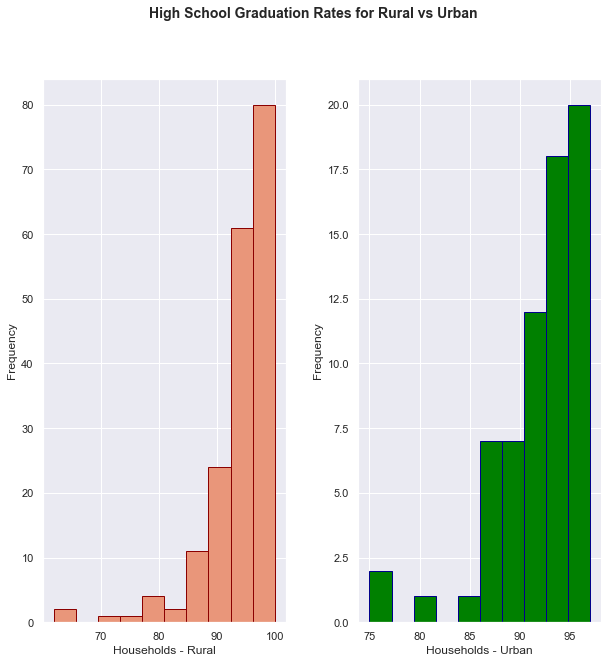

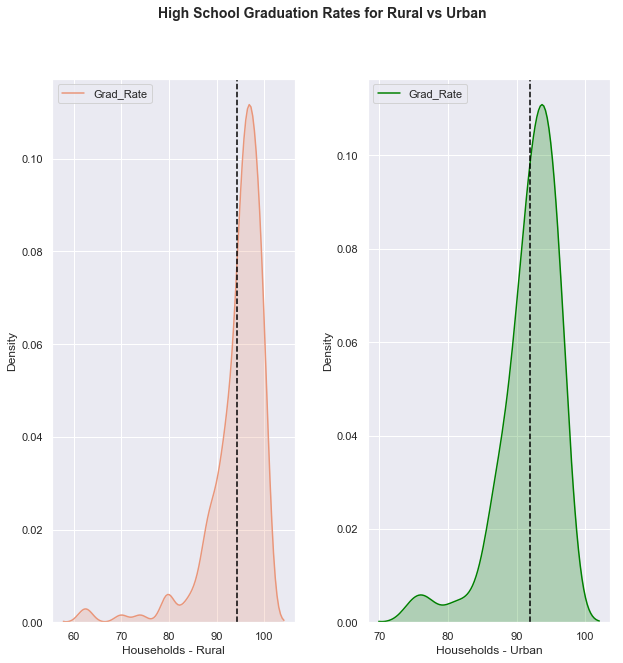

In [18]:
# =============================================================================
# Include a histogram of each of the 5 variables – in your summary and 
# analysis, identify any outliers and explain the reasoning for them being
# outliers and how you believe they should be handled (Chapter 2).   
# =============================================================================
# Histogram for distribution - Placed these histograms and KDEs here because they
# use the raw data not the normalized data. Did this so I could compare the 
# actual vlues and not the normalized values.  
# =============================================================================

# =============================================================================
# # Graduation Rates Rural vs Urban
# =============================================================================
subtitle = "High School Graduation Rates for Rural vs Urban"
xlab1 = "Households - Rural"
xlab2 = "Households - Urban"
mean1 = rg_mean
mean2 = ug_mean
ser1 = grad
ser2 = grad1
Hist_Plot(subtitle, xlab1, xlab2, ser1, ser2)

# KDE/PDF
Sns_Kde(subtitle,xlab1, xlab2, ser1, mean1, ser2, mean2)

In [19]:
# =============================================================================
# Using pg. 29 of your text as an example, compare two scenarios in your data using a
# PMF. Reminder, this isn’t comparing two variables against each other
#  – it is the same variable, but a different scenario. Almost like a filter.
#  The example in the book is first babies compared to all other babies, it
#  is still the same variable, but breaking the data out based on criteria 
#  we are exploring (Chapter 3).
# =============================================================================

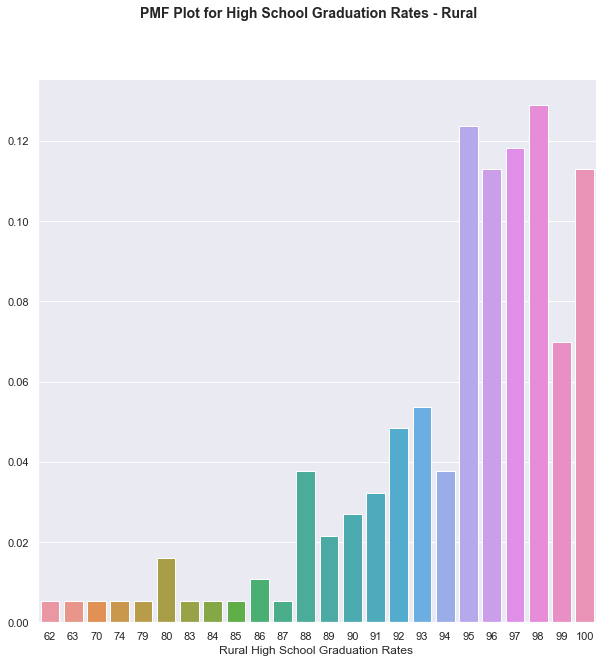

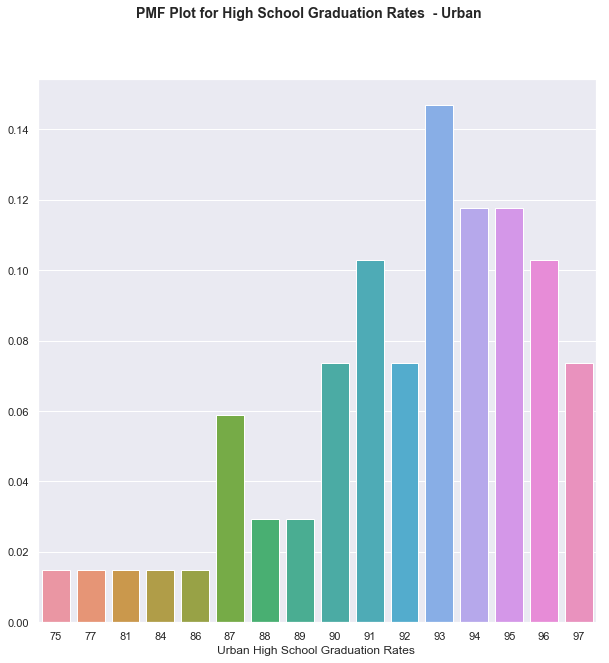

In [20]:
subtitle = 'PMF Plot for High School Graduation Rates - Rural'
data = grad
xlab = 'Rural High School Graduation Rates '
Pmf_plot(subtitle, data, xlab)
subtitle = 'PMF Plot for High School Graduation Rates  - Urban'
data = grad1
xlab = 'Urban High School Graduation Rates '
Pmf_plot(subtitle, data, xlab)

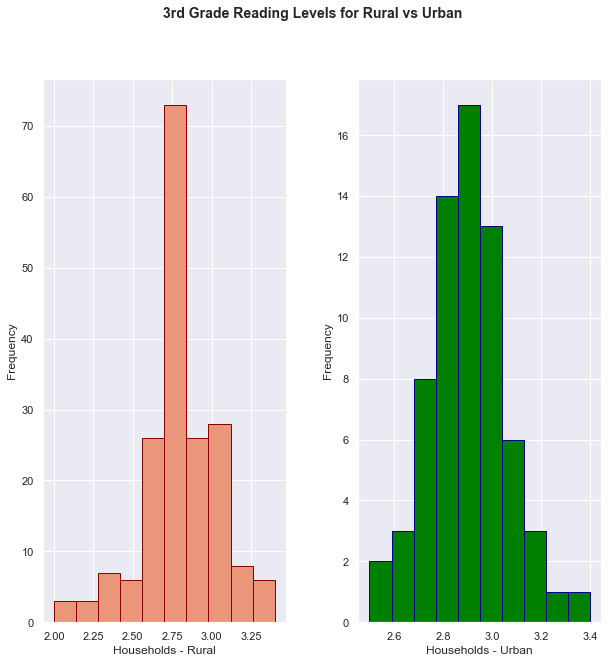

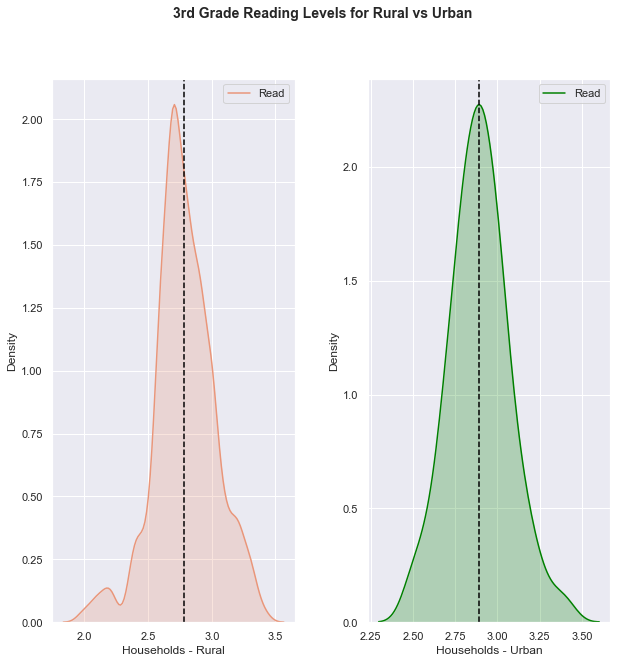

In [21]:
# =============================================================================
# # Histograms and PDFs 3rd grade Reading levels
# =============================================================================
subtitle = "3rd Grade Reading Levels for Rural vs Urban"
xlab1 = "Households - Rural"
xlab2 = "Households - Urban"
mean1 = rr_mean
mean2 = ur_mean
ser1 = read
ser2 = read1
Hist_Plot(subtitle, xlab1, xlab2, ser1, ser2)


# KDE/PDF
Sns_Kde(subtitle,xlab1, xlab2, ser1, mean1, ser2, mean2)

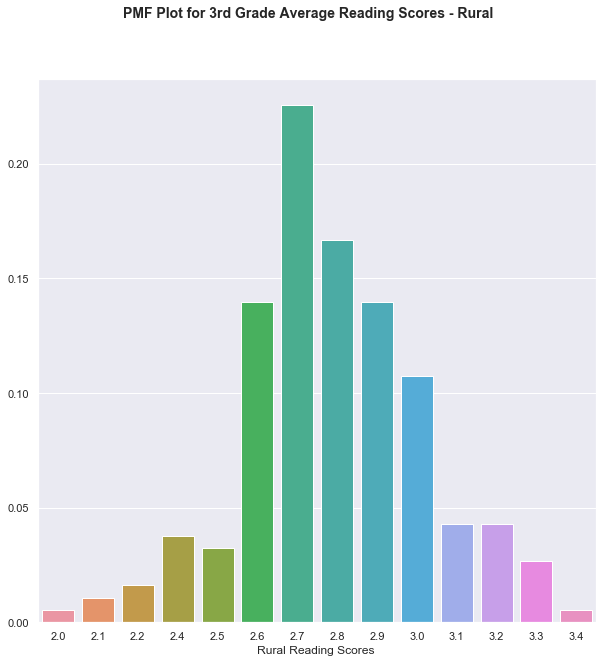

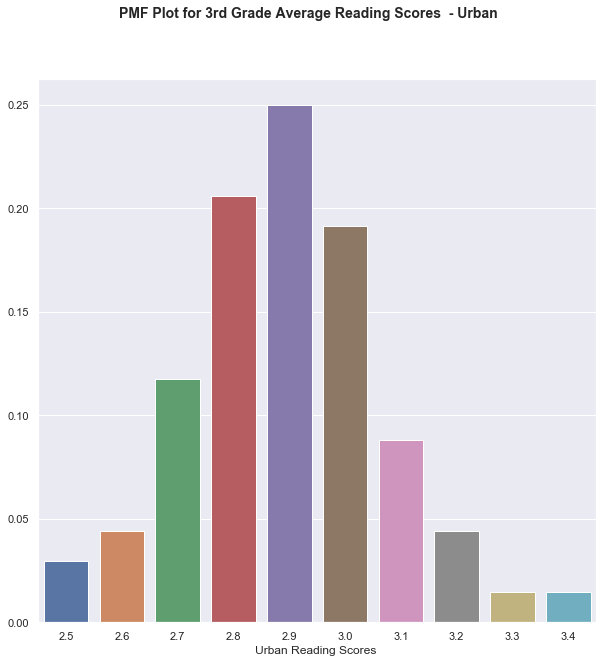

In [22]:
subtitle = 'PMF Plot for 3rd Grade Average Reading Scores - Rural'
data = read
xlab = 'Rural Reading Scores '
Pmf_plot(subtitle, data, xlab)
subtitle = 'PMF Plot for 3rd Grade Average Reading Scores  - Urban'
data = read1
xlab = 'Urban Reading Scores '
Pmf_plot(subtitle, data, xlab)

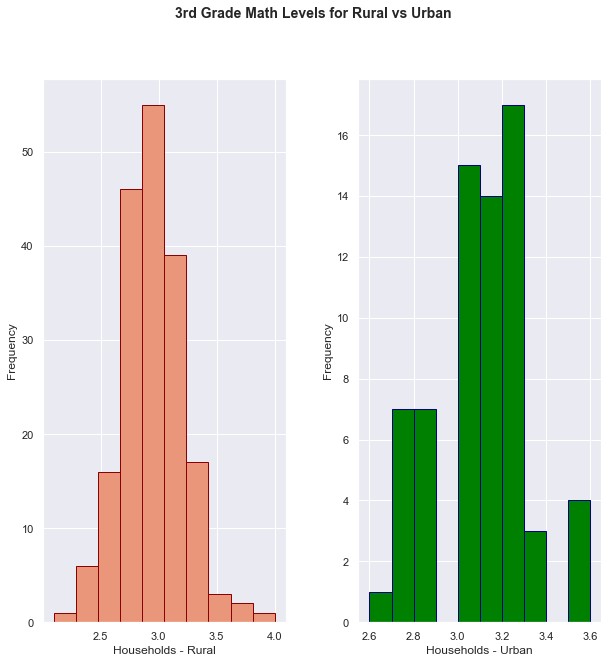

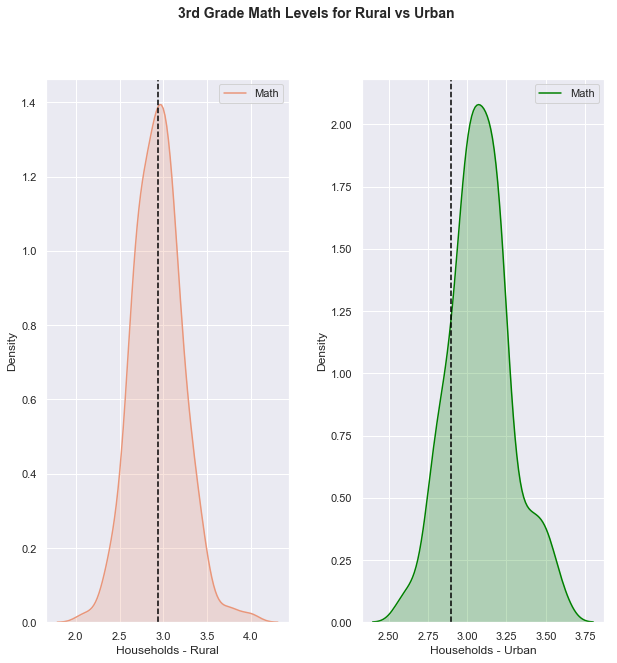

In [23]:
# =============================================================================
# # Histograms  and PDFs 3rd grade Math levels
# =============================================================================
subtitle = "3rd Grade Math Levels for Rural vs Urban"
xlab1 = "Households - Rural"
xlab2 = "Households - Urban"
mean1 = rm_mean
mean2 = ur_mean
ser1 = maths
ser2 = maths1
Hist_Plot(subtitle, xlab1, xlab2, ser1, ser2)

# KDE/PDFs
Sns_Kde(subtitle,xlab1, xlab2, ser1, mean1, ser2, mean2)


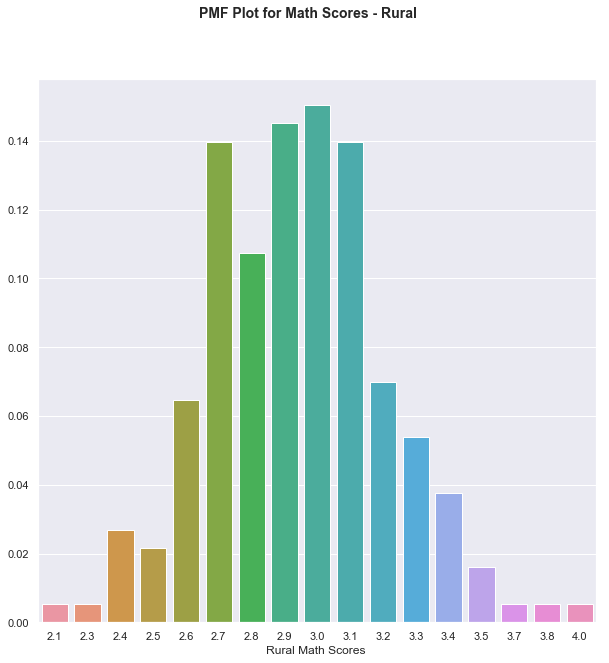

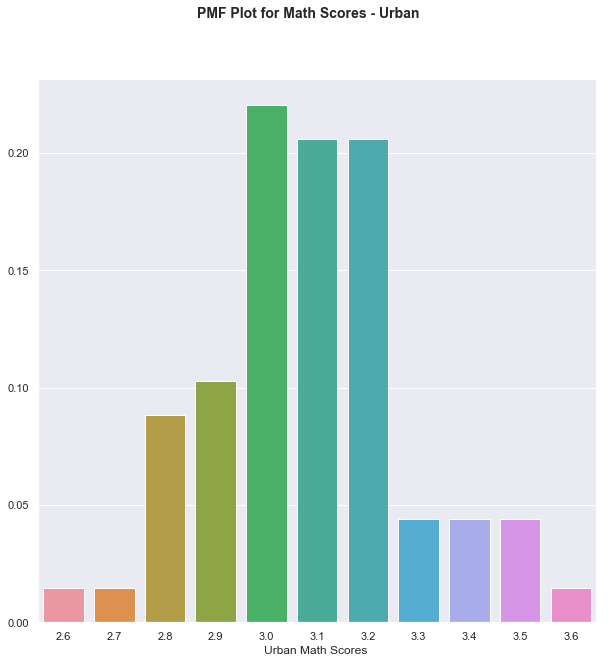

In [24]:
subtitle = 'PMF Plot for Math Scores - Rural'
data = maths
xlab = 'Rural Math Scores '
Pmf_plot(subtitle, data, xlab)
subtitle = 'PMF Plot for Math Scores - Urban'
data = maths1
xlab = 'Urban Math Scores '
Pmf_plot(subtitle, data, xlab)

In [25]:
# =============================================================================
# Conduct Correlation Tests - Chapter 9
# =============================================================================
# what if any is the correlation between 3rd grade levels and high school
# graduation
# need to normalize the data
# normalize the data  sklearn

scaler = MinMaxScaler()
rural_school = rural[['Read', 'Math', 'Grad_Rate']].copy()
urban_school = urban[['Read', 'Math', 'Grad_Rate']].copy()

rural_school[['Read', 'Math', 'Grad_Rate']] = scaler.fit_transform(rural_school[['Read',\
     'Math', 'Grad_Rate']])

urban_school[['Read', 'Math', 'Grad_Rate']] = scaler.fit_transform(urban_school[['Read',\
     'Math', 'Grad_Rate']])

#Pearson                                  
corr_rural1 = rural_school.corr(method="pearson")
print("Pearson correlation coefficient Rural :")
print(corr_rural1,"\n")

corr_urban1 = urban_school.corr(method="pearson")
print("Pearson correlation coefficient Urban:")
print(corr_urban1, "\n")

#Spearman
corr_rural2 = rural_school.corr(method="spearman")
print("Spearman correlation coefficient Rural :")
print(corr_rural2, "\n")

corr_urban2 = urban_school.corr(method="spearman")
print("Spearman correlation coefficient Urban :")
print(corr_urban2, "\n")

#Kendall's Tau
corr_rural3 = rural_school.corr(method="kendall")
print("Kendall Tau correlation coefficient Rural :")
print(corr_rural3, "\n")

corr_urban3 = urban_school.corr(method="kendall")
print("Kendall Tau correlation coefficient Urban:")
print(corr_urban3, "\n")

Pearson correlation coefficient Rural :
               Read      Math  Grad_Rate
Read       1.000000  0.739300   0.192063
Math       0.739300  1.000000   0.144729
Grad_Rate  0.192063  0.144729   1.000000 

Pearson correlation coefficient Urban:
               Read      Math  Grad_Rate
Read       1.000000  0.875327   0.424968
Math       0.875327  1.000000   0.377365
Grad_Rate  0.424968  0.377365   1.000000 

Spearman correlation coefficient Rural :
               Read      Math  Grad_Rate
Read       1.000000  0.725848   0.278714
Math       0.725848  1.000000   0.173201
Grad_Rate  0.278714  0.173201   1.000000 

Spearman correlation coefficient Urban :
               Read      Math  Grad_Rate
Read       1.000000  0.838901   0.438993
Math       0.838901  1.000000   0.317306
Grad_Rate  0.438993  0.317306   1.000000 

Kendall Tau correlation coefficient Rural :
               Read      Math  Grad_Rate
Read       1.000000  0.602315   0.211071
Math       0.602315  1.000000   0.134194
Grad_Rat

/Users/corosco/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/corosco/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


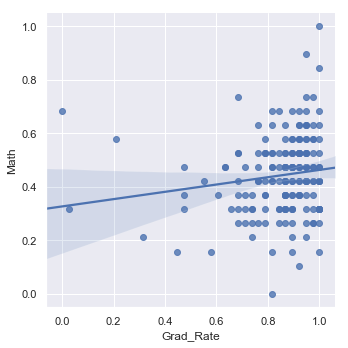

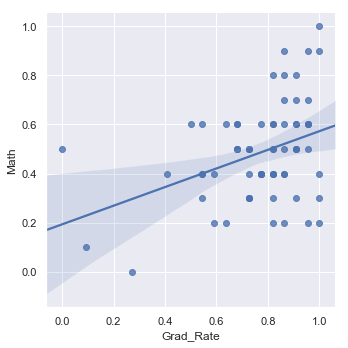

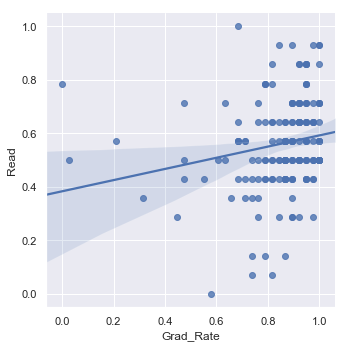

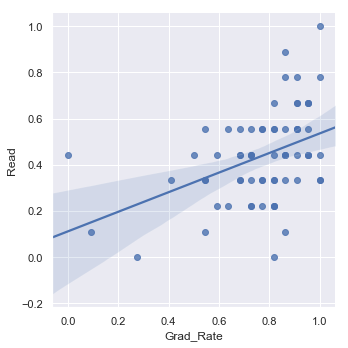

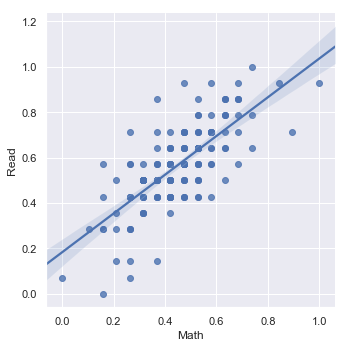

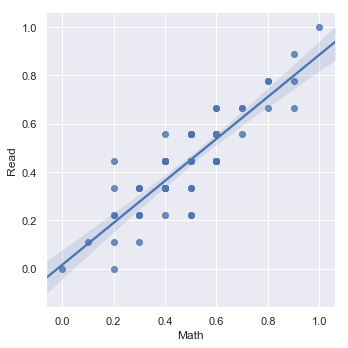

In [26]:
# Linear Relationship
subtitle = 'Graduation Rates and Reading Scores - Rural'
x_val = "Grad_Rate"
y_val = 'Math'
data = rural_school
sns.lmplot(x_val, y_val, data)

# Linear Relationship
subtitle = 'Graduation Rates and Reading Scores - Urban'
x_val = "Grad_Rate"
y_val = 'Math'
data = urban_school
sns.lmplot(x_val, y_val, data)

# Linear Relationship
subtitle = 'Graduation Rates and Reading Scores - Rural'
x_val = "Grad_Rate"
y_val = 'Read'
data = rural_school
sns.lmplot(x_val, y_val, data)

# Linear Relationship
subtitle = 'Graduation Rates and Reading Scores - Urban'
x_val = "Grad_Rate"
y_val = 'Read'
data = urban_school
sns.lmplot(x_val, y_val, data)

# Math and Reading
subtitle = 'Math and Reading Scores - Rural'
x_val = "Math"
y_val = 'Read'
data = rural_school
sns.lmplot(x_val, y_val, data)

# Math and Reading
subtitle = 'Math and Reading Scores - Urban'
x_val = "Math"
y_val = 'Read'
data = urban_school
sns.lmplot(x_val, y_val, data)



In [27]:
#Include a histogram of each of the 5 variables – in your summary and analysis, identify
#any outliers and explain the reasoning for them being outliers and how you believe they
#should be handled (Chapter 2).

## Is there a correlation between life expectancy and poor health, 
##  lack of sleep, no insurance, housing costs, access to food, and 
##  availability of doctors? 

## Is there a correlation between poor health and availability of doctors, 
## lack of sleep,  no insurance, housing costs, and access to food? 

In [28]:
# =============================================================================
# 3. Is there a correlation between life expectancy and poor health, 
#  lack of sleep, no insurance, housing costs, access to food, and 
#  availability of doctors? 
#
# 4. Is there a correlation between poor health and availability of doctors, 
#  lack of sleep,  no insurance, housing costs, and access to food? 
# =============================================================================

### Histograms and PDFs

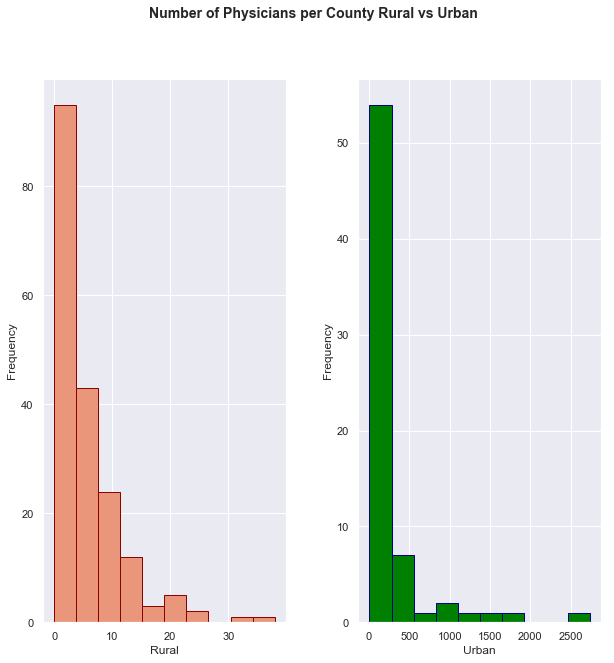

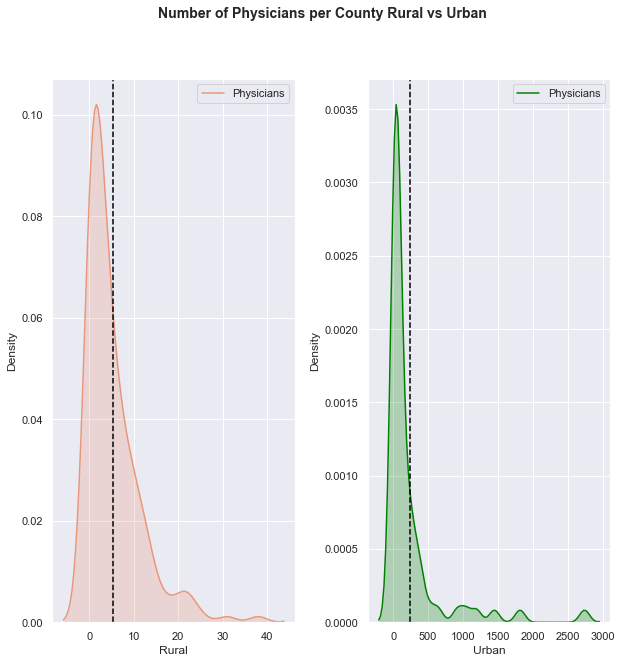

In [29]:
# Histogram and PDFs Physicians rural vs urban
# =============================================================================
# plot side by side for comparison
subtitle = "Number of Physicians per County Rural vs Urban"
xlab1 = "Rural"
xlab2 = "Urban"
ser1 = rural['Physicians']

ser2 = urban.Physicians
mean1 = rural.Physicians.mean()
mean2 = urban.Physicians.mean()
Hist_Plot(subtitle, xlab1, xlab2, ser1, ser2)

# KDE/PDFs
Sns_Kde(subtitle,xlab1, xlab2, ser1, mean1, ser2, mean2)

In [30]:
# Cohen's d while I have the mean
mean1 = rural.Physicians.var()
mean2 = urban.Physicians.var()
ser1 = rural.Physicians
ser2 = urban.Physicians
title = 'Cohens d for Physicians Rural vs Urban'
Compute_Cohend(mean1, mean2,ser1,ser2, var1, title)

Cohens d for Physicians Rural vs Urban = -375877.59850149235  



-375877.59850149235

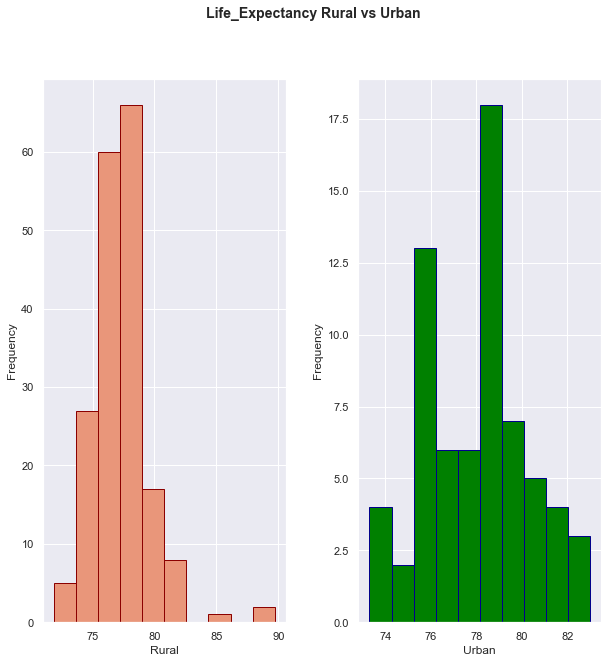

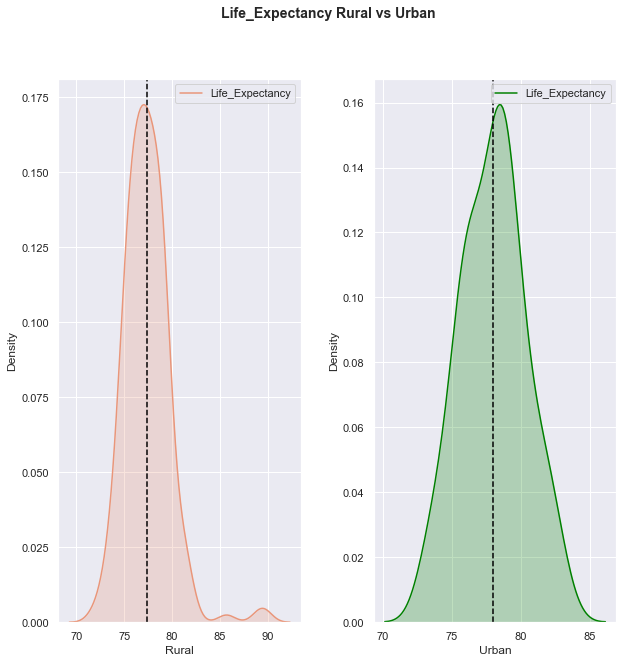

In [31]:
# Histogram and PDFs Life_Expectancy rural vs urban
# =============================================================================
# plot side by side for comparison
subtitle = "Life_Expectancy Rural vs Urban"
ser1 = rural['Life_Expectancy']

ser2 = urban.Life_Expectancy
mean1 = rural.Life_Expectancy.mean()
mean2 = urban.Life_Expectancy.mean()
Hist_Plot(subtitle, xlab1, xlab2, ser1, ser2)

# KDE/PDFs
Sns_Kde(subtitle,xlab1, xlab2, ser1, mean1, ser2, mean2)

In [32]:
# Cohen's d while I have the mean
rural.Life_Expectancy.var()
title = 'Cohens d for Life Expectancy Rural vs Urban'
Compute_Cohend(mean1, mean2,ser1,ser2, var1, title)

Cohens d for Life Expectancy Rural vs Urban = -1.099904255686382  



-1.099904255686382

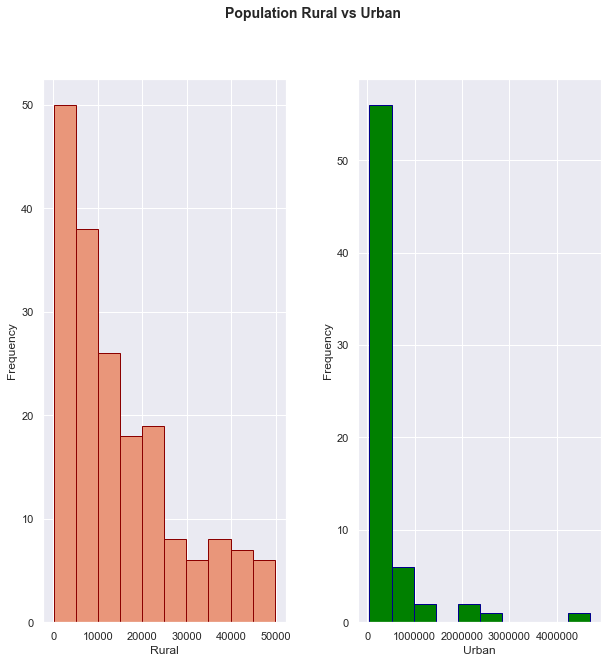

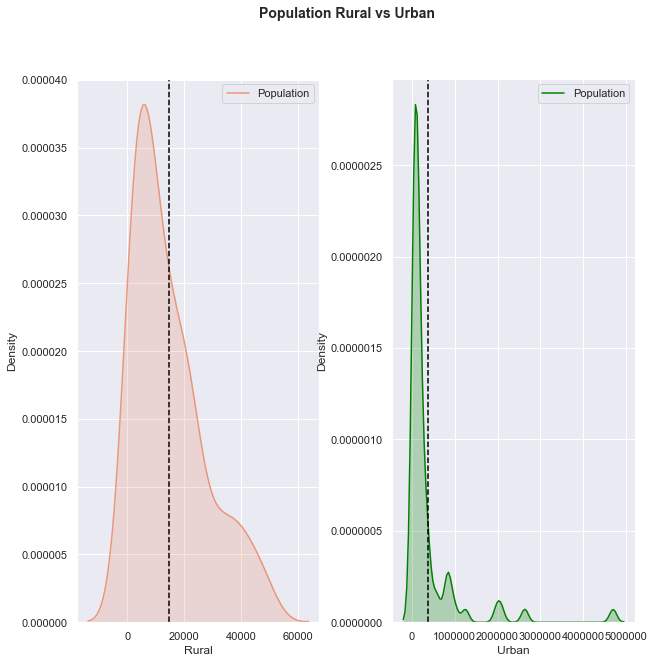

In [33]:
# Histogram and PDFs  rural vs urban
# =============================================================================
# plot side by side for comparison
subtitle = "Population Rural vs Urban"
ser1 = rural['Population']

ser2 = urban.Population
mean1 = rural.Population.mean()
mean2 = urban.Population.mean()
Hist_Plot(subtitle, xlab1, xlab2, ser1, ser2)

# KDE/PDFs
Sns_Kde(subtitle,xlab1, xlab2, ser1, mean1, ser2, mean2)

In [34]:
# Cohen's d while I have the mean
rural.Population.var()
title = 'Cohens d for Population Rural vs Urban'
Compute_Cohend(mean1, mean2,ser1,ser2, var1, title)

Cohens d for Population Rural vs Urban = -643614.5781972056  



-643614.5781972056

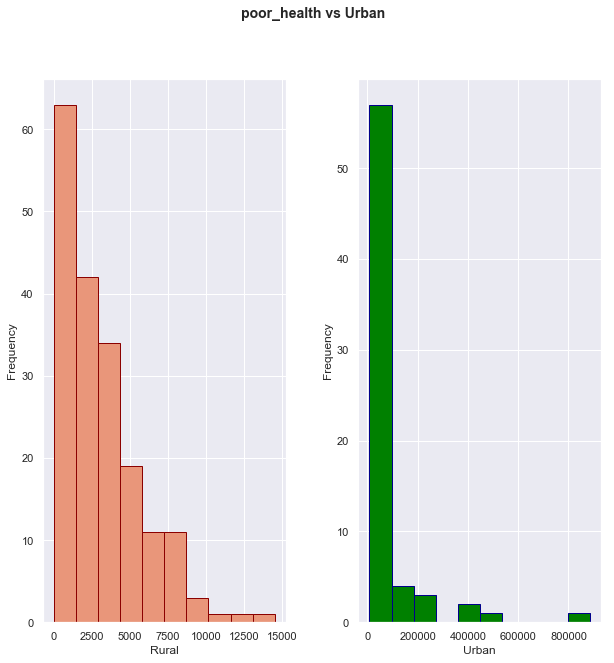

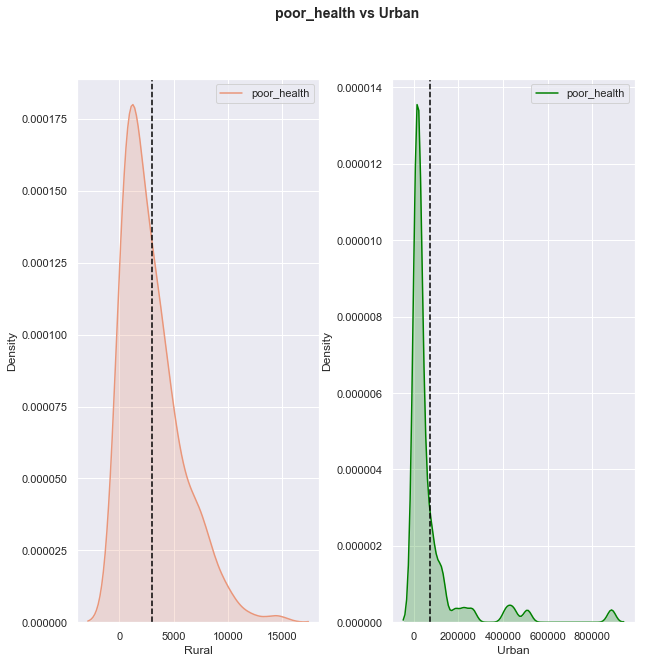

In [35]:
# Histogram and PDFs  rural vs urban
# =============================================================================
# plot side by side for comparison
subtitle = "poor_health vs Urban"
ser1 = rural['poor_health']

ser2 = urban.poor_health
mean1 = rural.poor_health.mean()
mean2 = urban.poor_health.mean()
Hist_Plot(subtitle, xlab1, xlab2, ser1, ser2)

# KDE/PDFs
Sns_Kde(subtitle,xlab1, xlab2, ser1, mean1, ser2, mean2)

In [36]:
# Cohen's d while I have the mean
var1 = rural.poor_health.var()
title = 'Cohens d for Poor Health vs Urban'
Compute_Cohend(mean1, mean2,ser1,ser2, var1, title)

Cohens d for Poor Health vs Urban = -31.33146101365113  



-31.33146101365113

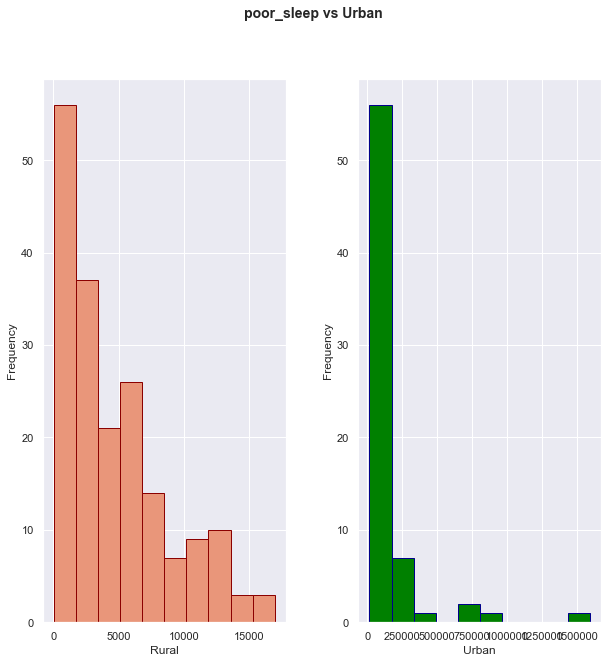

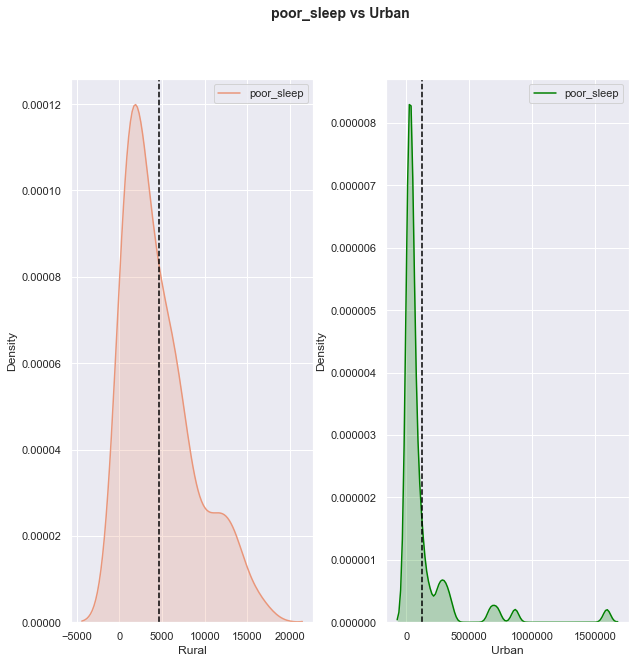

In [37]:
# Histogram and PDFs  rural vs urban
# =============================================================================
# plot side by side for comparison
subtitle = "poor_sleep vs Urban"
ser1 = rural['poor_sleep']

ser2 = urban.poor_sleep
mean1 = rural.poor_sleep.mean()
mean2 = urban.poor_sleep.mean()
Hist_Plot(subtitle, xlab1, xlab2, ser1, ser2)

# KDE/PDFs
Sns_Kde(subtitle,xlab1, xlab2, ser1, mean1, ser2, mean2)

In [38]:
# Cohen's d while I have the mean
var1 = rural.poor_sleep.var()
title = 'Cohens d for Poor Sleep  Rural vs Urban'
Compute_Cohend(mean1, mean2,ser1,ser2, var1, title)

Cohens d for Poor Sleep  Rural vs Urban = -35.08603547270512  



-35.08603547270512

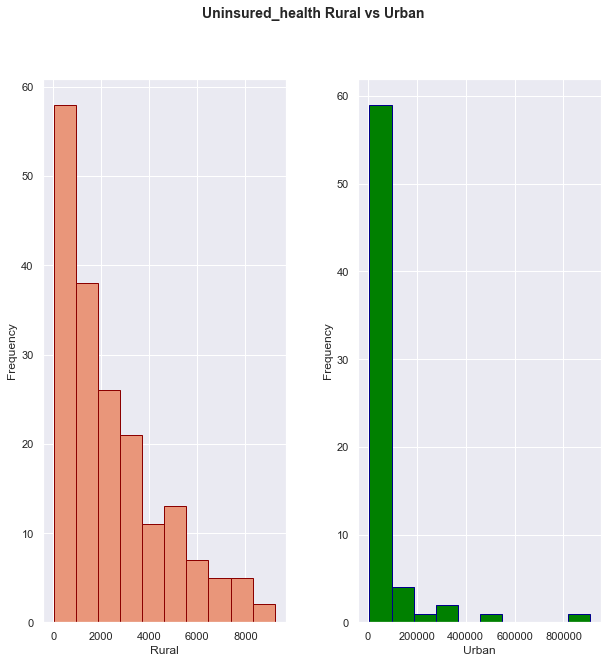

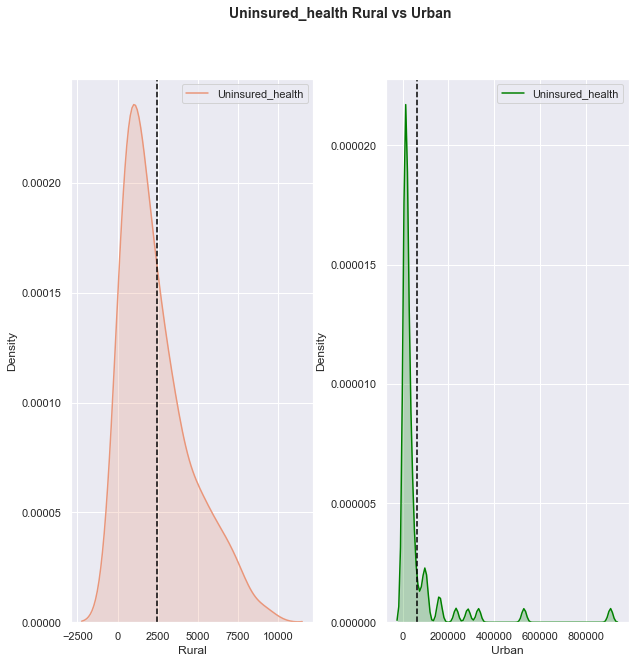

In [39]:
# Histogram and PDFs  rural vs urban
# =============================================================================
# plot side by side for comparison
subtitle = "Uninsured_health Rural vs Urban"
ser1 = rural['Uninsured_health']

ser2 = urban.Uninsured_health
mean1 = rural.Uninsured_health.mean()
mean2 = urban.Uninsured_health.mean()
Hist_Plot(subtitle, xlab1, xlab2, ser1, ser2)

# KDE/PDFs
Sns_Kde(subtitle,xlab1, xlab2, ser1, mean1, ser2, mean2)

In [40]:
# Cohen's d while I have the mean
var1 = rural.Uninsured_health.var()
title = 'Cohens d for Uninsured  Rural vs Urban'
Compute_Cohend(mean1, mean2,ser1,ser2, var1, title)

Cohens d for Uninsured  Rural vs Urban = -33.68266402418818  



-33.68266402418818

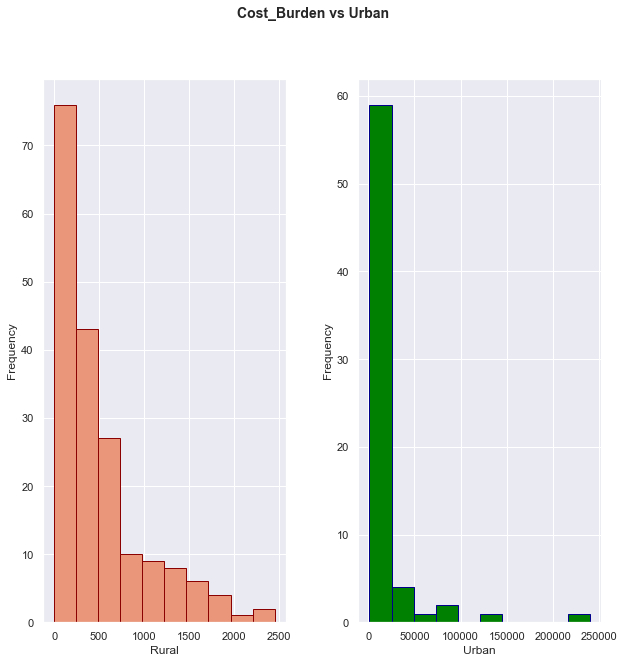

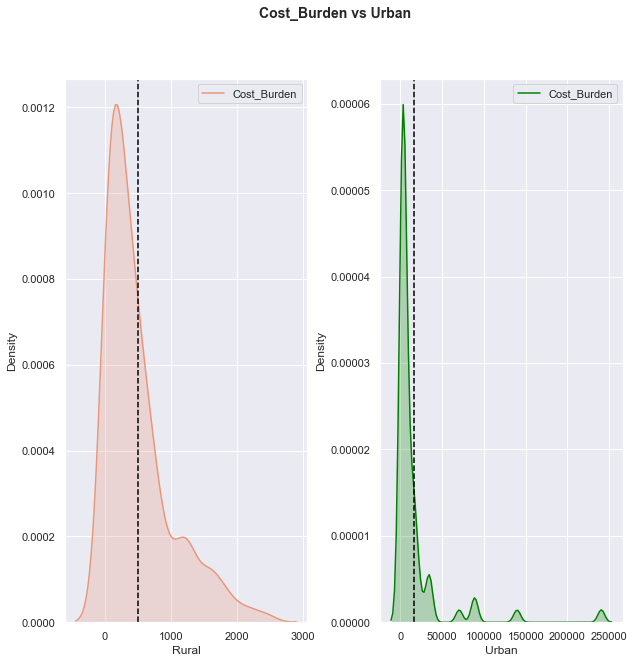

In [41]:
# Histogram and PDFs  rural vs urban
# =============================================================================
# plot side by side for comparison
subtitle = "Cost_Burden vs Urban"
ser1 = rural.Cost_Burden

ser2 = urban.Cost_Burden
mean1 = rural.Cost_Burden.mean()
mean2 = urban.Cost_Burden.mean()
Hist_Plot(subtitle, xlab1, xlab2, ser1, ser2)

# KDE/PDFs
Sns_Kde(subtitle,xlab1, xlab2, ser1, mean1, ser2, mean2)

In [42]:
# Cohen's d while I have the mean
var1 = rural.Cost_Burden.var()
title = 'Cohens d for Uninsured  Rural vs Urban'
Compute_Cohend(mean1, mean2,ser1,ser2, var1, title)

Cohens d for Uninsured  Rural vs Urban = -37.88726489156317  



-37.88726489156317

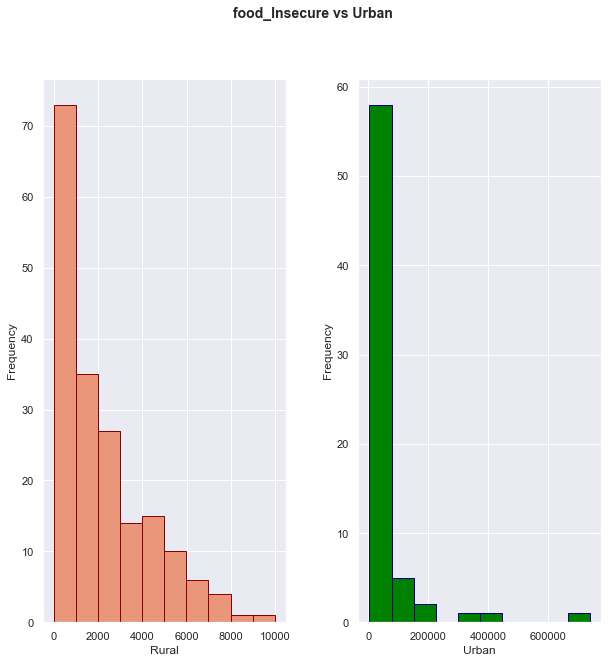

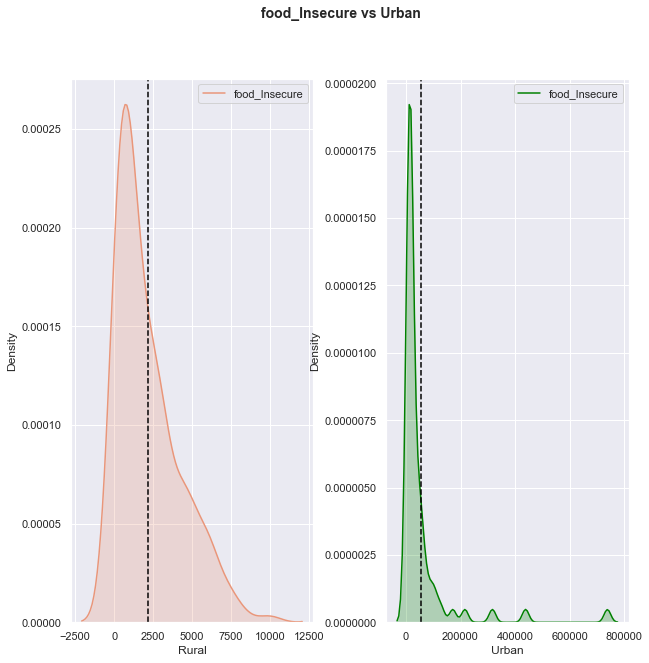

In [43]:
# Histogram and PDFs  rural vs urban
# =============================================================================
# plot side by side for comparison
subtitle = "food_Insecure vs Urban"
ser1 = rural.food_Insecure

ser2 = urban.food_Insecure
mean1 = rural.food_Insecure.mean()
mean2 = urban.food_Insecure.mean()
Hist_Plot(subtitle, xlab1, xlab2, ser1, ser2)

# KDE/PDFs
Sns_Kde(subtitle,xlab1, xlab2, ser1, mean1, ser2, mean2)

In [44]:
# Cohen's d while I have the mean
var1 = rural.food_Insecure.var()
title = 'Cohens d for Uninsured  Rural vs Urban'
Compute_Cohend(mean1, mean2,ser1,ser2, var1, title)

Cohens d for Uninsured  Rural vs Urban = -30.063165548759553  



-30.063165548759553

### Correlations

In [45]:
# =============================================================================
# Run correlation for bad health habits rural vs urban.  Hypothesis Do 
#   rural residents have worse health outcomes due to poor health, lack
#   of availability of doctors, access to food due to housing costs
#   which may have an impact on poor sleep and health?
# 
# =============================================================================

# normalize the data with sklearn
scaler = MinMaxScaler()
rural_df = rural[['Population', 'poor_health', 'poor_sleep', 'Uninsured_health',\
       'Life_Expectancy', 'Physicians', 'food_Insecure','Cost_Burden']].copy() 
       
       
rural_df[['Population','poor_health','poor_sleep','Uninsured_health',\
       'Life_Expectancy','Physicians','food_Insecure','Cost_Burden']]\
        = scaler.fit_transform(rural_df[['Population', 'poor_health', \
        'poor_sleep', 'Uninsured_health', 'Life_Expectancy', 'Physicians',\
       'food_Insecure', 'Cost_Burden']])
    

urban_df = urban[['Population', 'poor_health', 'poor_sleep', 'Uninsured_health',\
       'Life_Expectancy', 'Physicians', 'food_Insecure', 'Cost_Burden']].copy() 
       

urban_df[['Population','poor_health','poor_sleep','Uninsured_health',\
       'Life_Expectancy','Physicians','food_Insecure','Cost_Burden']]\
        = scaler.fit_transform(urban_df[['Population', 'poor_health', \
        'poor_sleep', 'Uninsured_health', 'Life_Expectancy', 'Physicians',\
       'food_Insecure', 'Cost_Burden']])
       

#Pearson Correlation
corr_rural1 = rural_df.corr(method="pearson")

corr_urban1 = urban_df.corr(method="pearson")

print("Pearson correlation coefficient Rural : \n")
print(corr_rural1,"\n")
print("Pearson correlation coefficient Urban : \n")
print(corr_urban1,"\n")

Pearson correlation coefficient Rural : 

                  Population  poor_health  poor_sleep  Uninsured_health  \
Population          1.000000     0.949782    0.997272          0.968661   
poor_health         0.949782     1.000000    0.961490          0.949579   
poor_sleep          0.997272     0.961490    1.000000          0.968746   
Uninsured_health    0.968661     0.949579    0.968746          1.000000   
Life_Expectancy    -0.169082    -0.157482   -0.179557         -0.147392   
Physicians          0.802969     0.716882    0.785917          0.765350   
food_Insecure       0.949488     0.866604    0.948382          0.901662   
Cost_Burden         0.941897     0.886859    0.938154          0.904360   

                  Life_Expectancy  Physicians  food_Insecure  Cost_Burden  
Population              -0.169082    0.802969       0.949488     0.941897  
poor_health             -0.157482    0.716882       0.866604     0.886859  
poor_sleep              -0.179557    0.785917       0.

/Users/corosco/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/corosco/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


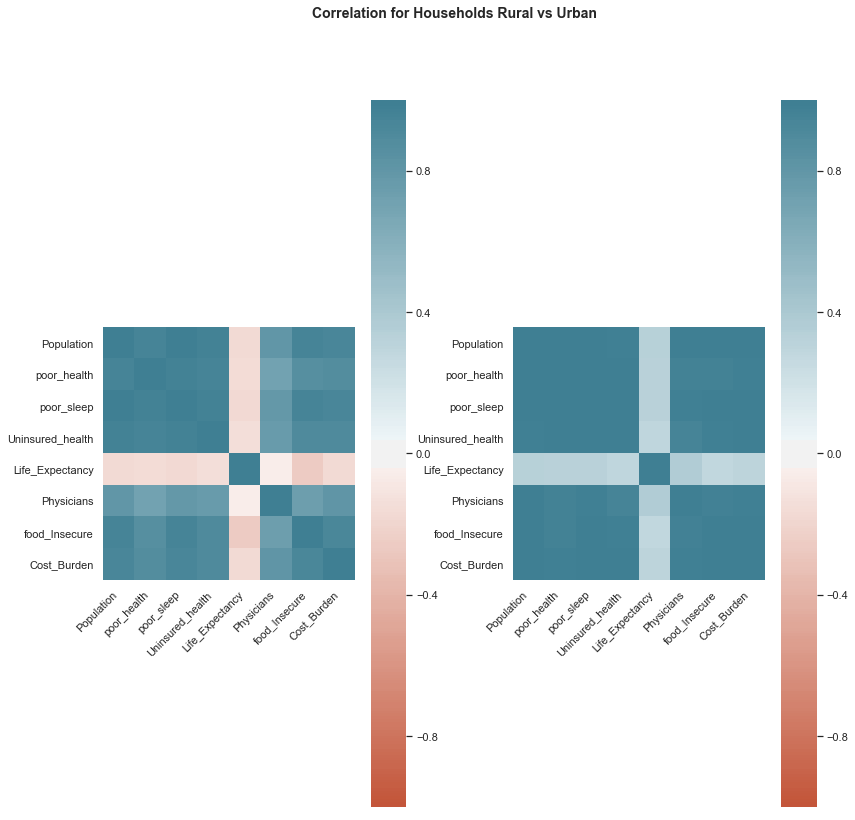

In [46]:
# =============================================================================
# Display correlation
# =============================================================================
subtitle = "Correlation for Households Rural vs Urban"
xlab1 = "Rural"
xlab2 = "Urban"
data1 = corr_rural1
data2 = corr_urban1
Heatmap_Plot(subtitle, xlab1, xlab2, data1, data2)

In [47]:
# =============================================================================
# Include the other descriptive characteristics about the variables: Mean,
#  Mode, Spread, and Tails (Chapter 2)
# =============================================================================
# =============================================================================
# # Display descriptive statistics
# =============================================================================
rural_cp = rural[['Population', 'poor_health', 'poor_sleep', 'Uninsured_health',\
       'Life_Expectancy', 'Physicians', 'food_Insecure','Cost_Burden']].copy()

urban_cp = urban[['Population', 'poor_health', 'poor_sleep', 'Uninsured_health',\
       'Life_Expectancy', 'Physicians', 'food_Insecure','Cost_Burden']].copy()


# before scaling
print('RURAL \n')
print(rural_cp.describe(), '\n')
print('URBAN \n')
print(urban_cp.describe(), '\n')




    

RURAL 

         Population   poor_health    poor_sleep  Uninsured_health  \
count    186.000000    186.000000    186.000000        186.000000   
mean   14770.026882   3064.365591   4692.655914       2444.564516   
std    12605.944718   2673.077929   4040.692191       2083.528517   
min      152.000000     23.000000     50.000000         27.000000   
25%     4470.000000    857.250000   1418.500000        812.750000   
50%    10989.000000   2335.500000   3414.500000       1827.500000   
75%    21421.000000   4372.750000   6814.750000       3549.000000   
max    49728.000000  14489.000000  16987.000000       9222.000000   

       Life_Expectancy  Physicians  food_Insecure  Cost_Burden  
count       186.000000  186.000000     186.000000   186.000000  
mean         77.393548    5.317204    2178.870968   496.537634  
std           2.376930    6.139057    2018.025879   505.374179  
min          71.900000    0.000000      10.000000     0.000000  
25%          75.800000    1.000000     572.50

In [48]:
# after scaling
print('RURAL \n')
print(rural_df.describe(), '\n')
print('URBAN \n')
print(urban_df.describe(), '\n')

RURAL 

       Population  poor_health  poor_sleep  Uninsured_health  Life_Expectancy  \
count  186.000000   186.000000  186.000000        186.000000       186.000000   
mean     0.294861     0.210242    0.274113          0.262922         0.308626   
std      0.254275     0.184783    0.238572          0.226594         0.133535   
min      0.000000     0.000000    0.000000          0.000000         0.000000   
25%      0.087099     0.057670    0.080799          0.085454         0.219101   
50%      0.218594     0.159858    0.198648          0.195813         0.303371   
75%      0.429018     0.300688    0.399407          0.383034         0.397472   
max      1.000000     1.000000    1.000000          1.000000         1.000000   

       Physicians  food_Insecure  Cost_Burden  
count  186.000000     186.000000   186.000000  
mean     0.139926       0.217758     0.202586  
std      0.161554       0.202613     0.206191  
min      0.000000       0.000000     0.000000  
25%      0.026316     

In [49]:
for x in rural_df:
    print(f'Mode for {x} = {rural_cp[x].mode()} \n')

Mode for Population = 0        152
1        277
2        442
3        648
4        726
5        749
6        823
7        903
8       1200
9       1234
10      1311
11      1362
12      1388
13      1389
14      1515
15      1516
16      1522
17      1892
18      1928
19      2131
20      2139
21      2204
22      2249
23      2252
24      2836
25      2895
26      2962
27      3028
28      3079
29      3253
       ...  
156    28360
157    28719
158    28875
159    29989
160    30119
161    31129
162    32587
163    33033
164    33830
165    35108
166    35286
167    35872
168    36354
169    36459
170    36552
171    36810
172    37924
173    40574
174    40822
175    41260
176    41619
177    42446
178    42454
179    43247
180    45129
181    45641
182    47542
183    49208
184    49565
185    49728
Length: 186, dtype: int64 

Mode for poor_health = 0         23
1         48
2         82
3        118
4        122
5        134
6        136
7        193
8        206
9        218
10  

In [50]:
for x in rural_df:
    print(f'Mode for {x} = {urban_cp[x].mode()} \n')

Mode for Population = 0       50031
1       50224
2       50310
3       50921
4       52405
5       52592
6       53126
7       54450
8       56019
9       57207
10      58057
11      58485
12      60537
13      64525
14      65711
15      66726
16      66893
17      68305
18      72480
19      74808
20      82299
21      83572
22      86323
23      86976
24      87092
25      92035
26      94324
27      96493
28     100657
29     118189
       ...   
38     148373
39     162124
40     163694
41     171361
42     172578
43     179436
44     222631
45     226758
46     230221
47     254607
48     255001
49     275910
50     307412
51     337890
52     355642
53     362265
54     370200
55     423908
56     566719
57     590925
58     787858
59     840758
60     859064
61     865939
62    1005146
63    1248743
64    1986049
65    2084931
66    2637772
67    4698619
Length: 68, dtype: int64 

Mode for poor_health = 0       8414
1       8712
2       9253
3       9300
4       9585
5       9

In [51]:
urban_df

,Population,poor_health,poor_sleep,Uninsured_health,Life_Expectancy,Physicians,food_Insecure,Cost_Burden
1,0.001727,0.003464,0.003406,0.000525,0.010309,0.005117,0.008586,0.001270
3,0.007973,0.011157,0.009640,0.009769,0.288660,0.016813,0.016818,0.010007
7,0.000060,0.003988,0.000970,0.001371,0.515464,0.000731,0.000000,0.000000
11,0.007948,0.010577,0.008545,0.009512,0.443299,0.006213,0.007933,0.004968
14,0.065743,0.072651,0.072176,0.037061,0.525773,0.101608,0.079942,0.055252
15,0.416474,0.499533,0.416107,0.308687,0.577320,0.527778,0.288484,0.364813
19,0.009528,0.010724,0.011877,0.005790,0.237113,0.020833,0.021731,0.011983
20,0.068874,0.067945,0.063671,0.041670,0.597938,0.083333,0.060416,0.040754
21,0.038017,0.036861,0.038829,0.028112,0.824742,0.067251,0.053585,0.068543
31,0.080428,0.141907,0.083038,0.108568,0.783505,0.073465,0.059273,0.068008


In [52]:
rural_df

,Population,poor_health,poor_sleep,Uninsured_health,Life_Expectancy,Physicians,food_Insecure,Cost_Burden
2,0.362595,0.247200,0.336837,0.376183,0.314607,0.236842,0.147590,0.138311
4,0.476844,0.336375,0.422625,0.440566,0.337079,0.236842,0.410643,0.482252
5,0.174157,0.082746,0.147370,0.142904,0.387640,0.131579,0.122490,0.098327
6,0.035098,0.014448,0.029108,0.024687,0.308989,0.000000,0.024096,0.026520
8,0.601844,0.353242,0.530850,0.528004,0.393258,0.157895,0.430723,0.403509
9,0.138676,0.129545,0.135443,0.173573,0.325843,0.078947,0.079317,0.045288
10,0.457318,0.265588,0.400189,0.325829,0.432584,0.157895,0.309237,0.251326
12,0.069187,0.040854,0.060459,0.052529,0.101124,0.131579,0.058233,0.028968
13,0.654248,0.535739,0.653776,0.427297,0.258427,0.184211,0.454819,0.517340
16,0.232976,0.130375,0.196906,0.203263,0.387640,0.131579,0.144578,0.174215


### Hypothesis Test

In [66]:
# =============================================================================
# Chapter 9 Test on Hypothesis.
# Normality Test
# =============================================================================
# # Shapiro-Wilk Test
# # Sample has a Gaussian Distribution
# =============================================================================
# create same sample size

s_rural = rural_df.sample(n=60, random_state=1)
s_rural.reset_index(drop=True, inplace=True)

s_urban = urban_df.sample(n=60, random_state=1)
s_urban.reset_index(drop=True, inplace=True)


stat, p = shapiro(rural_df)
print(f"Shapiro-Wilk Test - Rural \n")
print(f'stat= {stat} p = {p} \n')
if p > 0.05:
    print('Probably Gaussian \n')
else:
    print('Probably not Gaussian \n')

print(f"Shapiro-Wilk Test - Urban \n")    
stat, p = shapiro(urban_df)
print(f'stat= {stat} p = {p} \n')

if p > 0.05:
    print('Probably Gaussian \n')
else:
	print('Probably not Gaussian \n')
    
# =============================================================================
# #-D'Agostinos K^2 test 
# # p > 0.05
# =============================================================================
stat, p = normaltest(rural_df)

print(f"D'Agostinos K^2 test - Rural \n")
print(f'stat= {stat}\n')
print(f'p = {p} \n')

stat, p = normaltest(urban_df)

print(f"D'Agostinos K^2 test - Urban \n")
print(f'stat= {stat}\n')
print(f'p = {p} \n')

# =============================================================================
# Check the means of the samples 
# H0 = mean = mean indpendent and identical distribution
# show the how significant the difference is between the means.  Meaning
# could the differences have happened by chance. Larger the t-score the more
# difference between the groups. 
# https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
# A t-score of 3 means the groups are 3x as different from each other
# small t = more similar the groups are.
# low p = data did not occur by chance baseline = .05%
# =============================================================================
t, p = ttest_ind(rural_df, urban_df)
print( "Student's t-test Rural and Urban \n")

print(f't= {t}\n')
print(f'p = {p} \n') 
 
# =============================================================================
# # Calculate CI for difference of the means
# =============================================================================
ci = sms.CompareMeans(sms.DescrStatsW(rural_df), sms.DescrStatsW(urban_df))
print('Difference between the means CI')
print(ci.tconfint_diff(usevar='unequal'),'\n')
  
# =============================================================================
# Paired Student's t-test
# =============================================================================

t, p = ttest_rel(s_rural, s_urban)
print( "Paired Student's t-test Rural and Urban \n")
print(f't= {t}\n')
print(f'p = {p} \n')


Shapiro-Wilk Test - Rural 

stat= 0.8858976364135742 p = 9.19647064970336e-32 

Probably not Gaussian 

Shapiro-Wilk Test - Urban 

stat= 0.6095304489135742 p = 3.1120191727302785e-33 

Probably not Gaussian 

D'Agostinos K^2 test - Rural 

stat= [25.79760919 44.65363099 26.77023061 29.80436106 77.21659653 96.44366863
 35.93508877 56.87876197]

p = [2.50103829e-06 2.01181125e-10 1.53786525e-06 3.37337971e-07
 1.70855557e-17 1.14162494e-21 1.57323870e-08 4.45588290e-13] 

D'Agostinos K^2 test - Urban 

stat= [89.55656942 84.98611489 91.2761902  99.01825946  0.70700863 77.26905094
 98.02255886 96.24116205]

p = [3.57304133e-20 3.51155627e-19 1.51226233e-20 3.15107074e-22
 7.02222963e-01 1.66432746e-17 5.18408116e-22 1.26327295e-21] 

Student's t-test Rural and Urban 

t= [ 6.79323141  5.31725255  6.55877629  6.79038486 -7.51255979  2.35885894
  5.56395097  5.00468522]

p = [7.85440886e-11 2.32278625e-07 3.05527250e-10 7.98651687e-11
 1.00808010e-12 1.90950891e-02 6.72848316e-08 1.0512224

In [ ]:
t, p = ttest_rel(s_rural, s_urban)

In [67]:
# =============================================================================
# Conduct linear regression analysis
# Using life expectancy as the reponse how do 
# poor health, lack of sleep, no insuranceand availability of Physicians
# affect LE. Use poor_health as the response variable, how do the
# factors affect poor_health.
# =============================================================================
# =============================================================================
# For this project, conduct a regression analysis on either one dependent and 
# one explanatory variable, or multiple explanatory variables (Chapter 10 & 11)
# =============================================================================
# =============================================================================
# Create two scatter plots comparing two variables and provide your analysis
#  on correlation and causation. Remember, covariance, Pearson’s correlation, 
#  and Non- Linear Relationships should also be considered during your analysis
#  (Chapter 7).
# =============================================================================
# =============================================================================
#  How do the factors affect life expectancy
# =============================================================================


In [55]:
# Rename variables
life = s_rural.Life_Expectancy
health = s_rural.poor_health
sleep = s_rural.poor_sleep
uninsured = s_rural.Uninsured_health
docs = s_rural.Physicians
food = s_rural.food_Insecure
burden = s_rural.Cost_Burden

life1 = s_urban.Life_Expectancy
health1 = s_urban.poor_health
sleep1 = s_urban.poor_sleep
uninsured1 = s_urban.Uninsured_health
docs1 = s_urban.Physicians
food1 = s_urban.food_Insecure
burden1 = s_urban.Cost_Burden 

# Fit the models
# Rural
mod1 = smf.ols('life ~ health + sleep + uninsured + docs\
                + food + burden',
                data=s_rural).fit()
print('                     RURAL', '\n')
print(mod1.summary(),'\n')

# Urban
mod2 = smf.ols('life1 ~ health1 + sleep1 + uninsured1 + docs1\
                 + food1 + burden1',
                 data=s_urban).fit()
print('-                    URBAN', '\n')
print(mod2.summary(), '\n')



                     RURAL 

                            OLS Regression Results                            
Dep. Variable:                   life   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2.376
Date:                Fri, 29 May 2020   Prob (F-statistic):             0.0417
Time:                        08:32:57   Log-Likelihood:                 49.587
No. Observations:                  60   AIC:                            -85.17
Df Residuals:                      53   BIC:                            -70.51
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2873  

In [56]:
# =============================================================================
# How do the factors affect health
# =============================================================================
# Rural
mod2 = smf.ols('health ~ life + sleep + uninsured + docs\
                + food + burden', data=s_rural).fit()
print('                        RURAL', '\n')
print(mod2.summary(), '\n')

# Urban
mod2 = smf.ols('health1 ~ life1 + sleep1 + uninsured1 + docs1\
                + food1 + burden1', data=s_urban).fit()
print('                         URBAN', '\n')
print(mod2.summary(), '\n')


                        RURAL 

                            OLS Regression Results                            
Dep. Variable:                 health   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     226.4
Date:                Fri, 29 May 2020   Prob (F-statistic):           6.13e-36
Time:                        08:32:57   Log-Likelihood:                 113.20
No. Observations:                  60   AIC:                            -212.4
Df Residuals:                      53   BIC:                            -197.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.013

### Linear Relationships

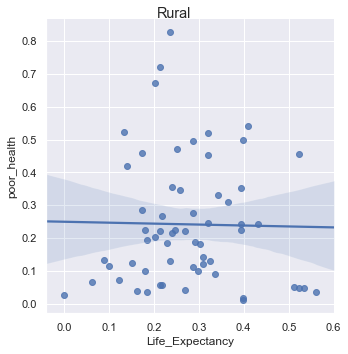

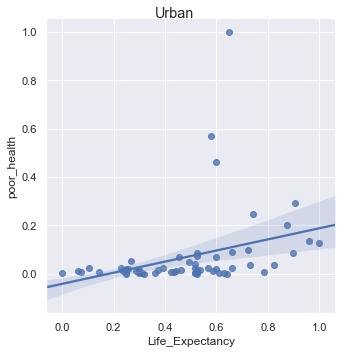

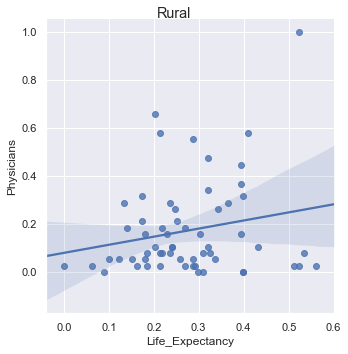

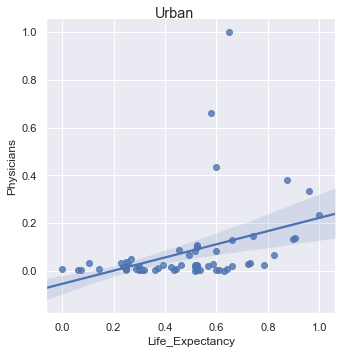

In [57]:
# Linear Relationship
subtitle = 'Rural'
x_val = "Life_Expectancy"
y_val = 'poor_health'
data = s_rural
fig = sns.lmplot(x_val, y_val, data).fig.suptitle(subtitle)

subtitle = 'Urban'
x_val = "Life_Expectancy"
y_val = 'poor_health'
data = s_urban
fig = sns.lmplot(x_val, y_val, data).fig.suptitle(subtitle)

subtitle = 'Rural'
x_val = "Life_Expectancy"
y_val = 'Physicians'
data = s_rural
fig = sns.lmplot(x_val, y_val, data).fig.suptitle(subtitle)

subtitle = 'Urban'
x_val = "Life_Expectancy"
y_val = 'Physicians'
data = s_urban
fig = sns.lmplot(x_val, y_val, data).fig.suptitle(subtitle)



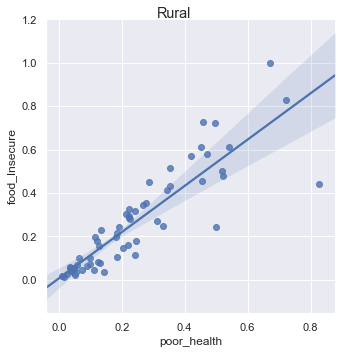

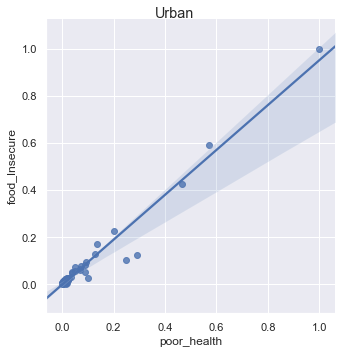

In [58]:
# Linear Relationship
subtitle = 'Rural'
x_val = 'poor_health'
y_val = 'food_Insecure'
data = s_rural
fig = sns.lmplot(x_val, y_val, data).fig.suptitle(subtitle)

subtitle = 'Urban'
x_val = 'poor_health'
y_val = 'food_Insecure'
data = s_rural
data = s_urban
fig = sns.lmplot(x_val, y_val, data).fig.suptitle(subtitle)

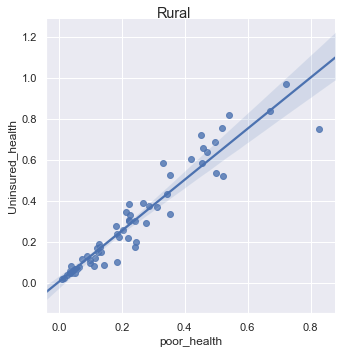

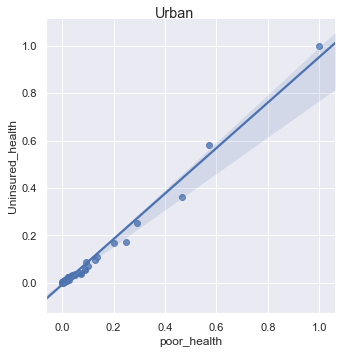

In [59]:
# Linear Relationship
subtitle = 'Rural'
x_val = 'poor_health'
y_val = 'Uninsured_health'
data = s_rural
fig = sns.lmplot(x_val, y_val, data).fig.suptitle(subtitle)

subtitle = 'Urban'
x_val = 'poor_health'
y_val = 'Uninsured_health'
data = s_rural
data = s_urban
fig = sns.lmplot(x_val, y_val, data).fig.suptitle(subtitle)

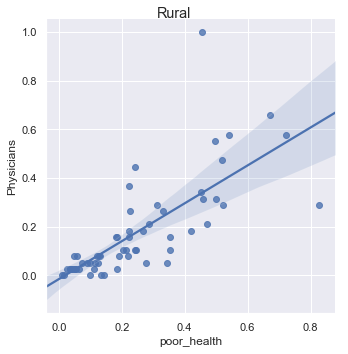

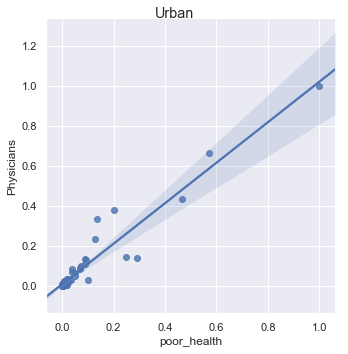

In [60]:
# Linear Relationship
subtitle = 'Rural'
x_val = 'poor_health'
y_val = 'Physicians'
data = s_rural
fig = sns.lmplot(x_val, y_val, data).fig.suptitle(subtitle)

subtitle = 'Urban'
x_val = 'poor_health'
y_val = 'Physicians'
data = s_urban

fig = sns.lmplot(x_val, y_val, data).fig.suptitle(subtitle)

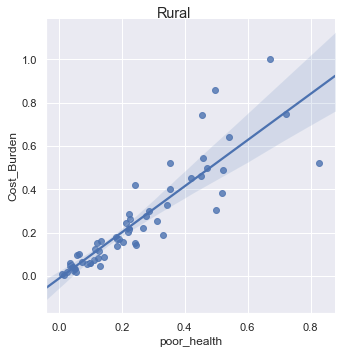

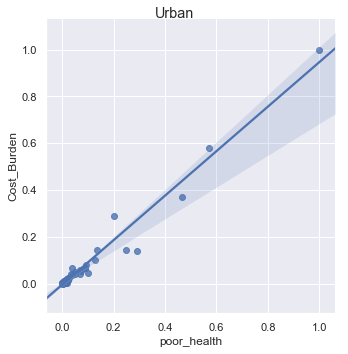

In [61]:
# Linear Relationship
subtitle = 'Rural'
x_val = 'poor_health'
y_val = 'Cost_Burden'
data = s_rural
fig = sns.lmplot(x_val, y_val, data).fig.suptitle(subtitle)

subtitle = 'Urban'
x_val = 'poor_health'
y_val = 'Cost_Burden'
data = s_urban

fig = sns.lmplot(x_val, y_val, data).fig.suptitle(subtitle)

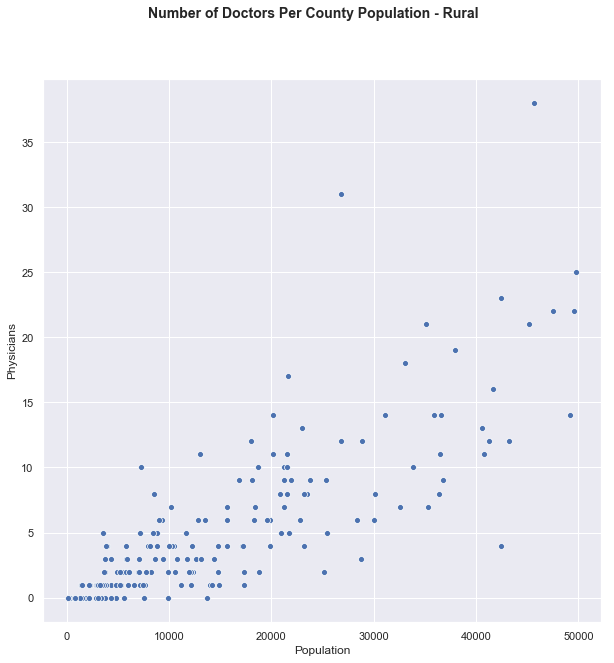

In [62]:
subtitle = 'Number of Doctors Per County Population - Rural'
x_val = 'Population'
y_val = 'Physicians'
xlab = 'Population per County'
ylab = '# of Physicians'
data = rural
sns_Scatter(subtitle, xlab, ylab, x_val, y_val, data)

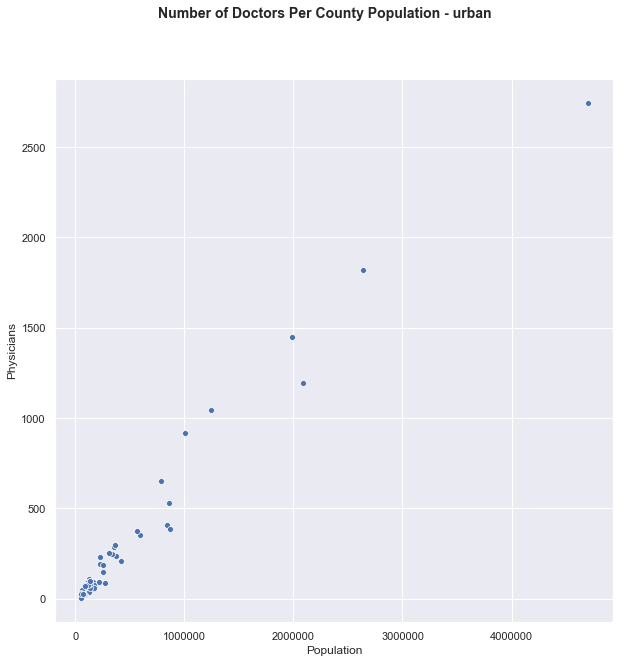

In [63]:
subtitle = 'Number of Doctors Per County Population - urban'
x_val = 'Population'
y_val = 'Physicians'
xlab = 'Population per County'
ylab = '# of Physicians'
data = urban
sns_Scatter(subtitle, xlab, ylab, x_val, y_val, data)